In [1]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Error in <TMacOSXSystem::Load>: version mismatch, /Users/erezcohen/larlite/lib/libEG2DataMining_EG2DataMiningPackage.so = 60410, ROOT = 60602
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libEG2DataMining_EG2DataMiningPackage.so for TAnalysisEG2
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is 

# load data

In [2]:
PmissBins   = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65]  , [0.65,0.75] , [0.75,1.0]]

cm_pars = dict()
ana_data = dict()
for target in ['C12','Al27','Fe56','Pb208']:
    cm_pars[target] = pd.read_csv( "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/%s_dataCMparameters.csv"%target ) 
    ana_data[target] = TAnalysisEG2( "/Users/erezcohen/Desktop/DataMining/AnaFiles" ,  "Ana_ppSRCCut_DATA_%s"%target )

## 1 Pmiss Bins in transverse directions and 5 in longitudinal

In [198]:
sims = pd.concat([
        # with a cut on fit_sigma_std_ratio>0.75
    #         pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/Ntimes20_CutOnKurtosisSkewness_results_56322runs.csv')
        # with a cut on number of maxima == 1 in each PcmZ distribution
        pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_2000_simulationruns_results.csv')
        ,pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/Ntimes10_NoCut_OrTrees_results_126853runs.csv')
#         pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/Ntimes20_CutNmax_results_679799runs.csv')
#         pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/Ntimes20_CutNmax_OrTrees_results_322629runs.csv')
                  ])
print len(sims),'runs in the sample'

133022 runs in the sample


In [199]:
# sims=sims[sims['parameters_reconstructed_well']==True]
sims=sims[sims['parameters_reconstructed_well']!='0']
sims.fillna(0.0,inplace=True)
print len(sims),'runs in the sample'
for target in ['C12','Al27','Fe56','Pb208']:
    print len(sims[sims['ks_Pval_pcmX_pcmY_pcmZ_'+target]>0]),'events with ks_Pval_pcmX_pcmY_pcmZ_%s>0'%target

130543 runs in the sample
1411 events with ks_Pval_pcmX_pcmY_pcmZ_C12>0
7877 events with ks_Pval_pcmX_pcmY_pcmZ_Al27>0
1086 events with ks_Pval_pcmX_pcmY_pcmZ_Fe56>0
41024 events with ks_Pval_pcmX_pcmY_pcmZ_Pb208>0


In [152]:
# sample = sims[(sims['ks_PvalTotal_C12']==0)&(sims['gen_SigmaX']>0.15)&(sims['gen_SigmaX']<0.16)]
target='Fe56'
sample = sims[sims['ks_Pval_pcmX_pcmY_pcmZ_'+target]>1e-4]
sample = sims[sims['ks_Pval_pcmX_pcmY_pcmZ_Bonferroni_'+target]>1e-4]

sample[['run'
        ,'ks_Pval_pcmX_pcmY_pcmZ_'+target 
        ,'ks_Pval_pcmX_pcmY_pcmZ_Bonferroni_'+target 
        ,'gen_SigmaX','gen_a1','gen_a2','gen_b1','gen_b2'
        ,'recMeanX','recSigmaX','ks_local_Pval_pcmX_'+target
        ,'recSigmaY','ks_local_Pval_pcmY_'+target
        ,'ks_local_Pval_pcmZ_'+target                                         
        ,'ks_Pval_pcmX_pcmY_pcmZ_'+target
        ,'recmean_z_bin0','recsigma_z_bin0','ks_local_Pval_pcmZ_bin0_'+target      
        ,'recmean_z_bin1','recsigma_z_bin1','ks_local_Pval_pcmZ_bin1_'+target
        ,'recmean_z_bin2','recsigma_z_bin2','ks_local_Pval_pcmZ_bin2_'+target
        ,'recmean_z_bin3','recsigma_z_bin3','ks_local_Pval_pcmZ_bin3_'+target
        ,'recmean_z_bin4','recsigma_z_bin4','ks_local_Pval_pcmZ_bin4_'+target
       ]]

,run,ks_Pval_pcmX_pcmY_pcmZ_Fe56,ks_Pval_pcmX_pcmY_pcmZ_Bonferroni_Fe56,gen_SigmaX,gen_a1,gen_a2,gen_b1,gen_b2,recMeanX,recSigmaX,...,ks_local_Pval_pcmZ_bin1_Fe56,recmean_z_bin2,recsigma_z_bin2,ks_local_Pval_pcmZ_bin2_Fe56,recmean_z_bin3,recsigma_z_bin3,ks_local_Pval_pcmZ_bin3_Fe56,recmean_z_bin4,recsigma_z_bin4,ks_local_Pval_pcmZ_bin4_Fe56
9,10012,0.000000,0.001973,0.183853,0.595233,0.325025,0.623967,0.376401,-0.009141,0.211452,...,0.000324,0.195925,0.299978,0.000600,0.245182,0.310419,0.002001,0.394319,0.369550,0.389687
41,10059,0.000027,0.022315,0.125358,0.232537,0.254440,0.825760,0.471036,-0.019406,0.144311,...,0.038810,0.227564,0.272213,0.037980,0.282924,0.253122,0.065652,0.389867,0.283993,0.418259
92,10136,0.000000,0.001623,0.175793,-0.150908,0.211146,0.432176,0.354053,-0.010995,0.204733,...,0.050487,0.207419,0.182222,0.766996,0.278925,0.161075,0.002251,0.377443,0.147176,0.003906
134,10191,0.000000,0.001784,0.183867,0.494637,0.405313,0.386559,0.430288,-0.009495,0.211197,...,0.000124,0.275864,0.409402,0.000159,0.318852,0.388238,0.014162,0.389708,0.357265,0.343450
189,14680,0.001051,0.001187,0.143013,0.406228,0.246090,0.364838,0.359033,-0.015706,0.168597,...,0.093105,0.151489,0.183033,0.000079,0.217100,0.212544,0.121926,0.282083,0.243905,0.029645
267,14786,0.002165,0.078932,0.121663,0.550893,0.211722,1.154990,0.437102,-0.019941,0.148186,...,0.192786,0.196716,0.174190,0.005262,0.273962,0.236262,0.097624,0.453815,0.363202,0.176797
380,4738,0.000000,0.000865,0.144828,0.172990,0.235998,0.135523,0.305911,-0.016402,0.166470,...,0.001147,0.144267,0.177424,0.000058,0.166272,0.174675,0.005653,0.257056,0.192080,0.008409
412,4777,0.000000,0.000885,0.110988,0.059627,0.176765,0.082359,0.392192,-0.020893,0.135345,...,0.369659,0.182264,0.099798,0.002407,0.245146,0.117266,0.012271,0.313759,0.142255,0.012416
604,7243,0.000001,0.000117,0.143156,0.114514,0.248057,0.713689,0.388447,-0.017068,0.166306,...,0.000226,0.173622,0.207127,0.001142,0.252716,0.210042,0.496230,0.354363,0.210884,0.357390
626,7273,0.000000,0.001472,0.155464,0.355294,0.289591,0.444629,0.365254,-0.015110,0.180239,...,0.000098,0.163180,0.242952,0.000745,0.205294,0.244029,0.012411,0.310787,0.260040,0.264880


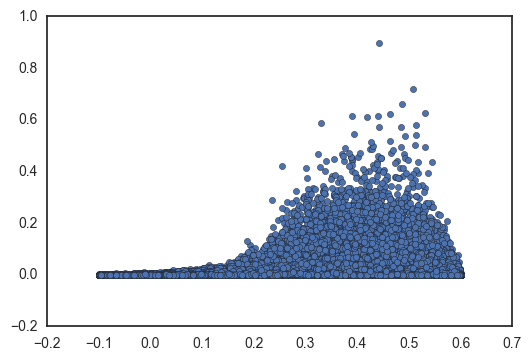

In [173]:
plt.scatter(sims['gen_b2'],sims['ks_Pval_pcmX_pcmY_pcmZ_Bonferroni_Pb208'])

## a1 vs. a2 - kill runs in which \sigma_z < 0

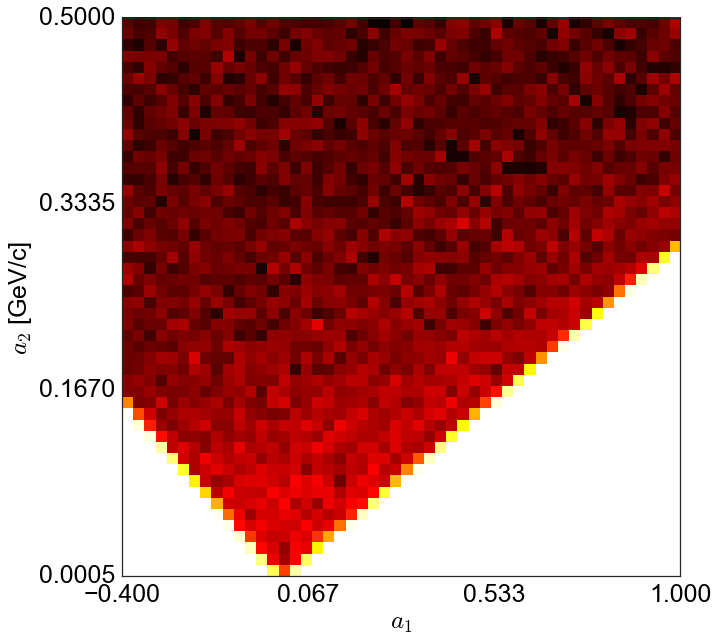

In [10]:
plot_2d_hist(sample['gen_a1'],sample['gen_a2'],xlabel='$a_1$',ylabel='$a_2$ [GeV/c]');

## sigma_t

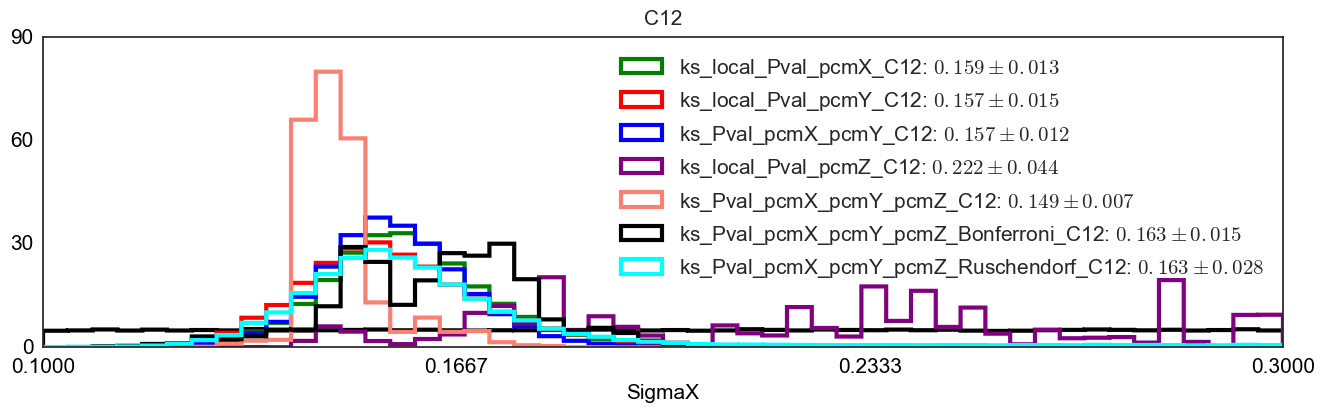

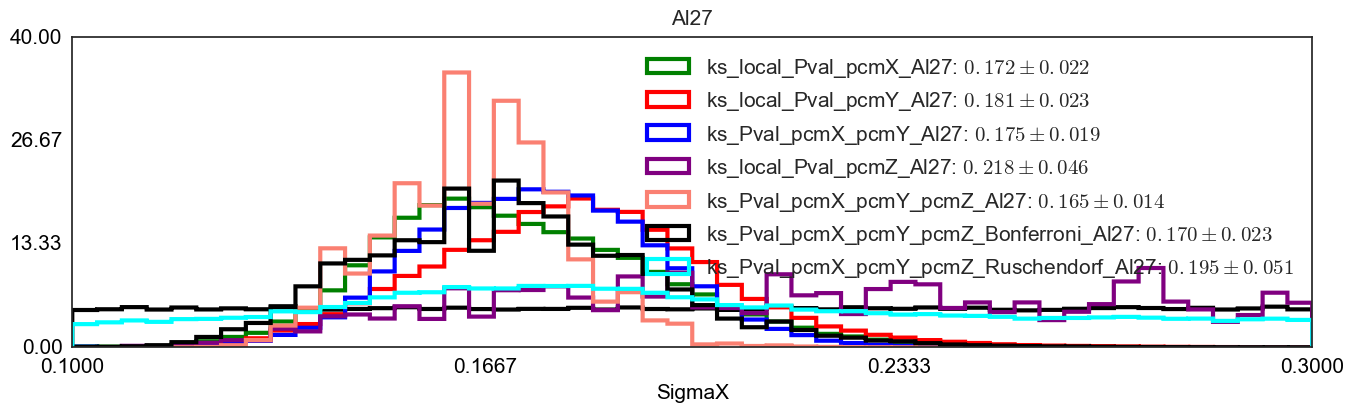

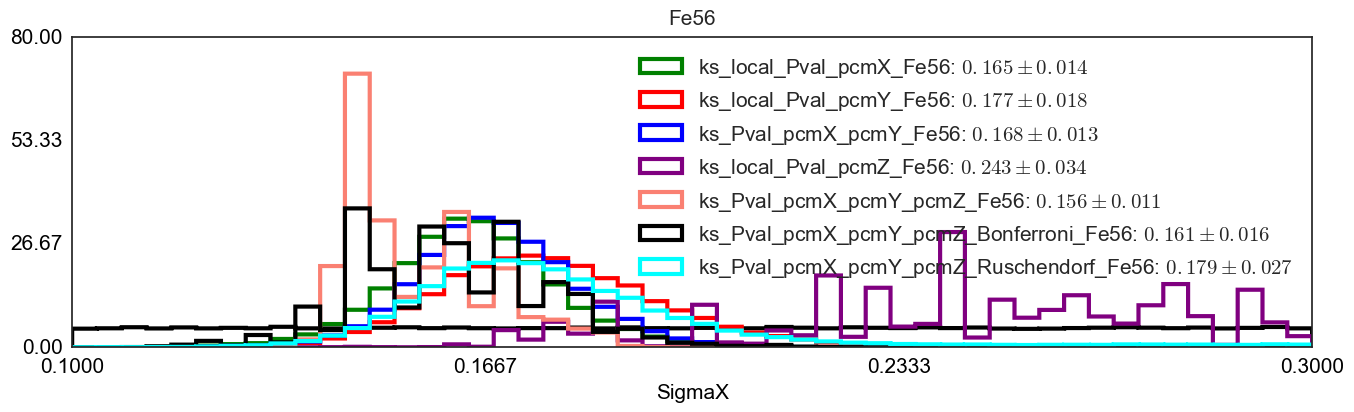

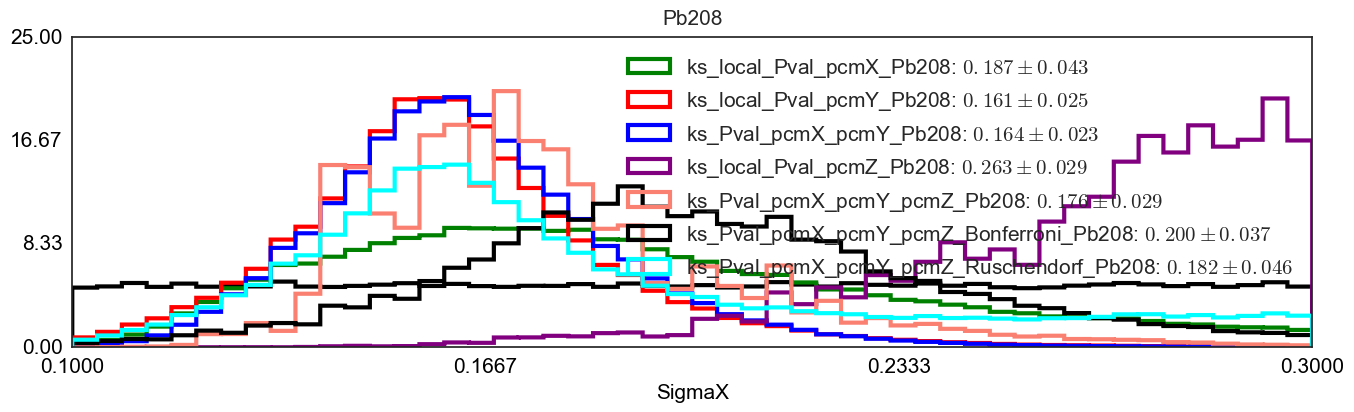

In [202]:
sample = sims[sims['gen_b2']<0.3]
# sample = sims

for target in ['C12','Al27','Fe56','Pb208']:    
    fig,ax = plt.subplots(figsize=(16,4))
    parameter = 'SigmaX'
#     x = sample['rec'+parameter]
    x = sample['gen_'+parameter] 
    h,bins,_=plt.hist(x,bins=50,normed=1,histtype='step',linewidth=3,color='black')
    weights_array = [
        'ks_local_Pval_pcmX_'+target,
                     'ks_local_Pval_pcmY_'+target,
                     'ks_Pval_pcmX_pcmY_'+target,
                     'ks_local_Pval_pcmZ_'+target,
        'ks_Pval_pcmX_pcmY_pcmZ_'+target,                     
        'ks_Pval_pcmX_pcmY_pcmZ_Bonferroni_'+target,        
        'ks_Pval_pcmX_pcmY_pcmZ_Ruschendorf_'+target,
#                      ,'ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_'+target
#                      'ks_PvalTotal_'+target,
# #                      ,'ks_Pval_pcmX+pcmY+pcmZ_'+target
                    ] 
    colors = ['green','red','blue','purple','salmon','black','cyan','yellow']
    y_max,mu,sigma=0,[],[]
    for i,weights_name,color in zip(range(len(weights_array)),weights_array,colors):
        weights = sample[weights_name]
        if np.sum(weights)>0:
            mu.append(np.average(x , weights=weights))
            sigma.append(np.sqrt(np.average((x-mu[-1])**2, weights=weights)))
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1,histtype='step',linewidth=3,color=color,label=weights_name+': $%.3f\\pm%.3f$'%(mu[-1],sigma[-1]));
            if np.max(h)>y_max: y_max=np.max(h)
    ax.legend(loc='best',fontsize=15)
    set_axes(ax,x_label=parameter,fontsize=15)
    ax.set_title(target,fontsize=15,y=1.02)    
#     ax.set_yscale('log')

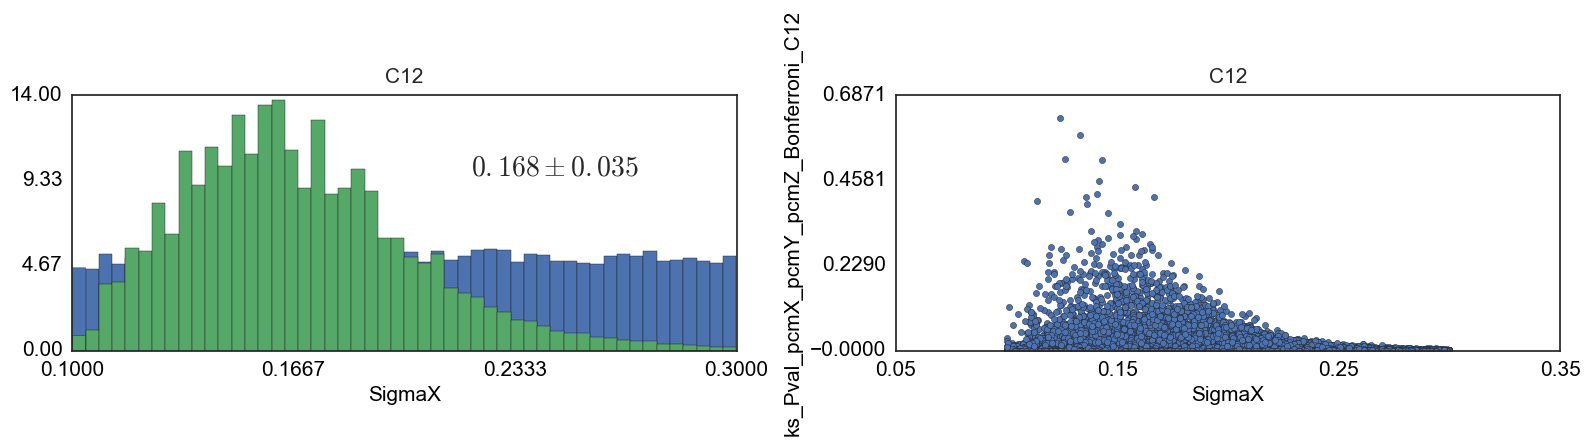

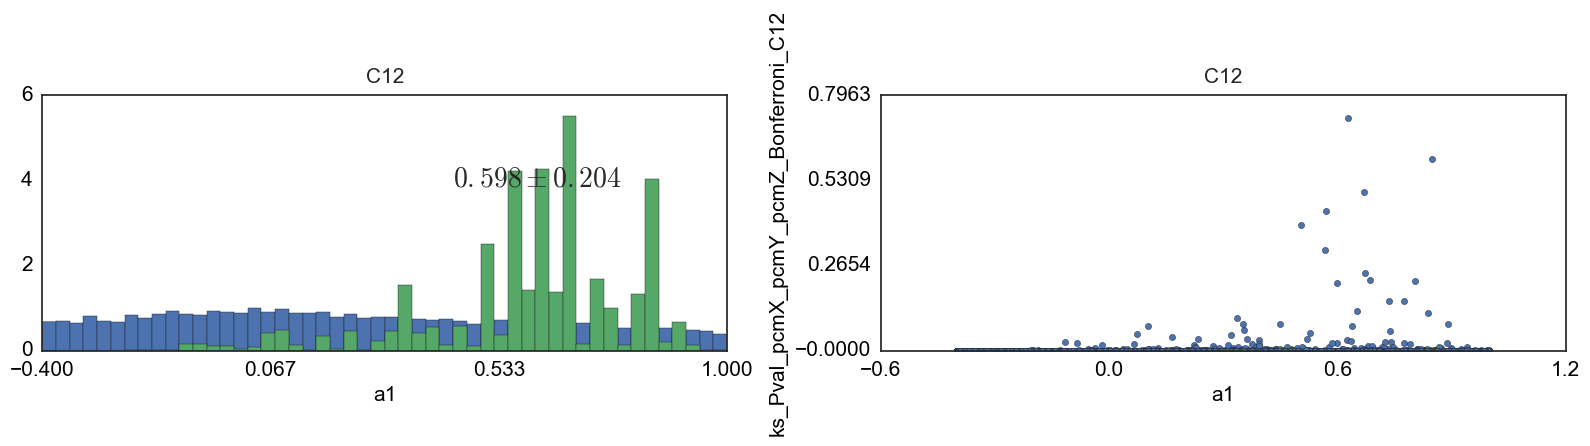

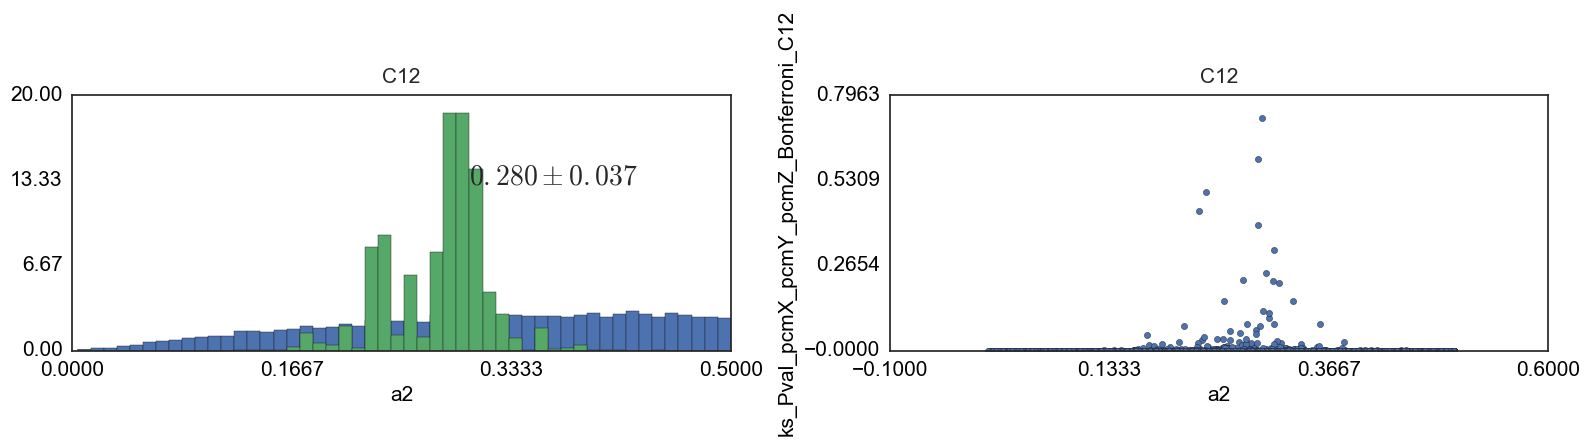

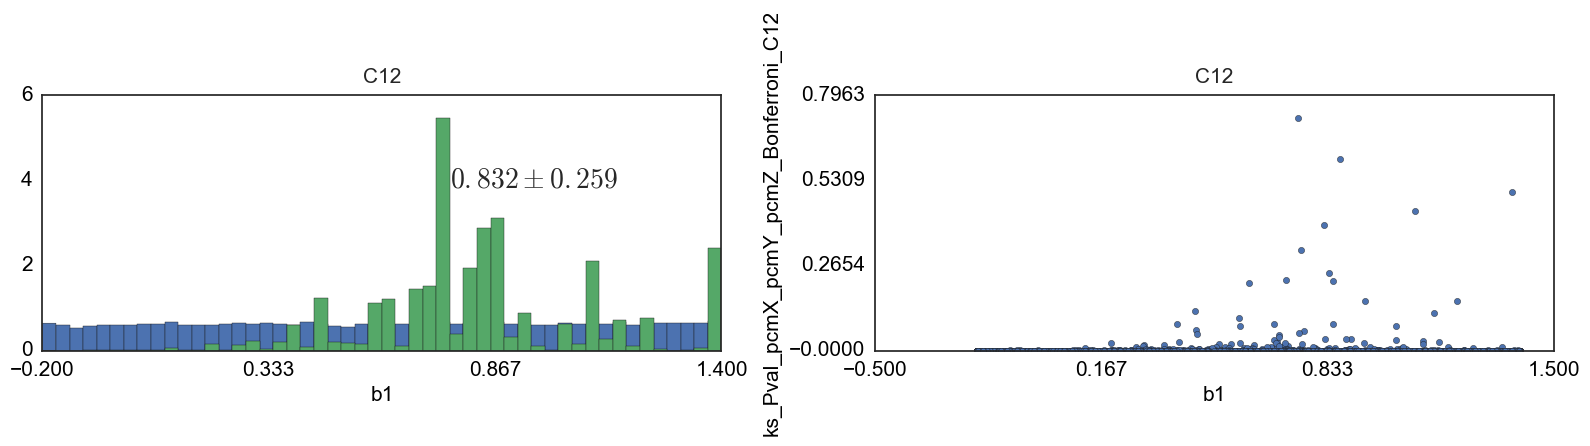

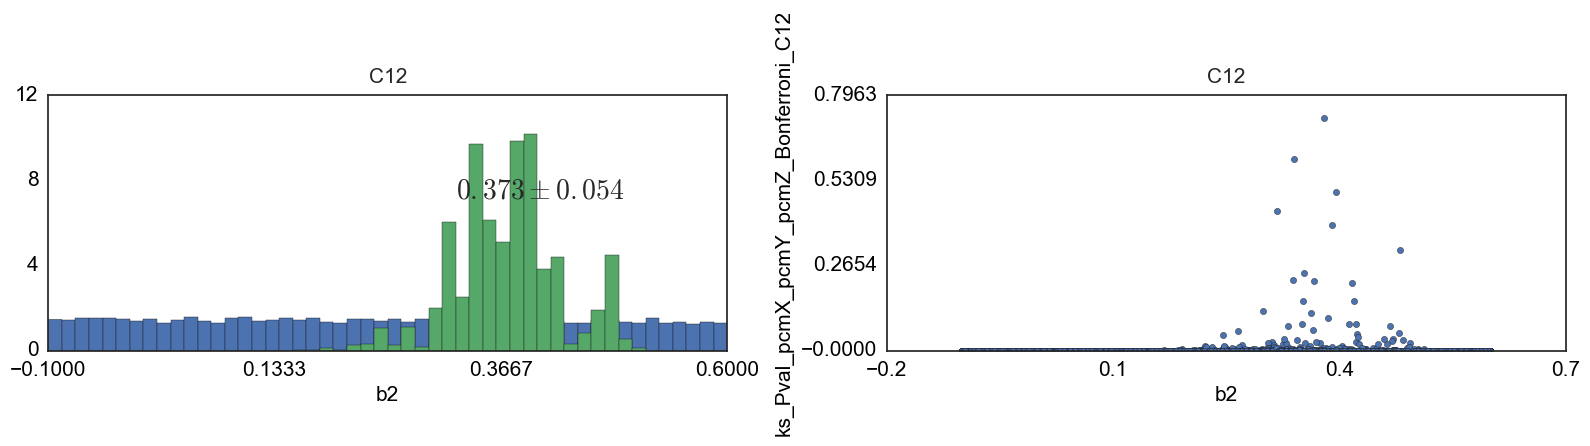

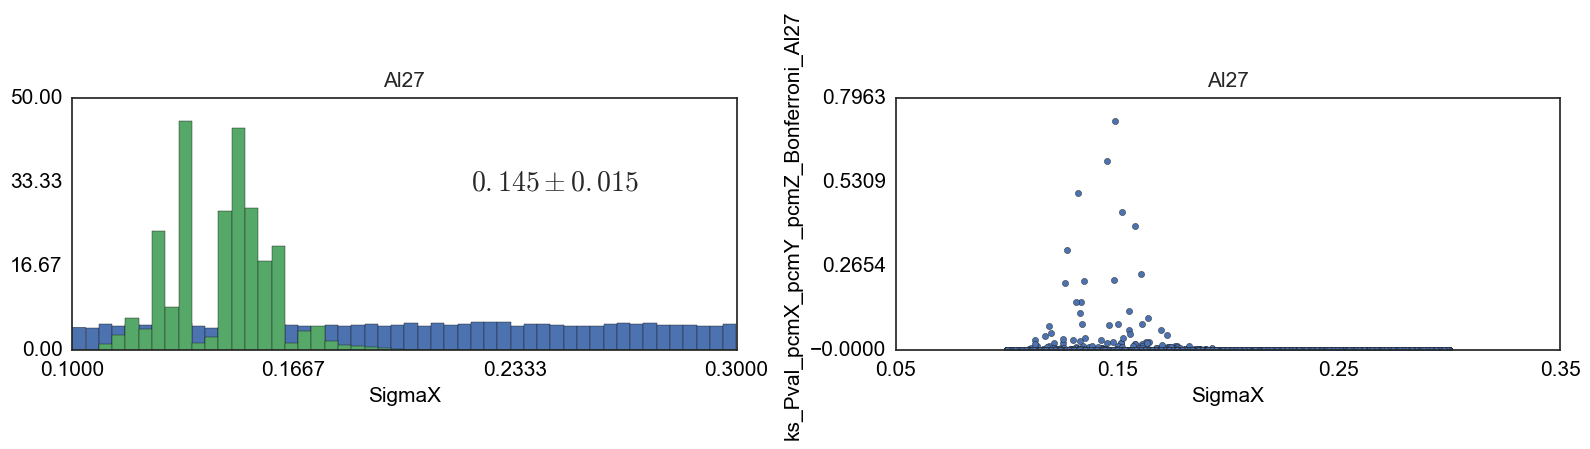

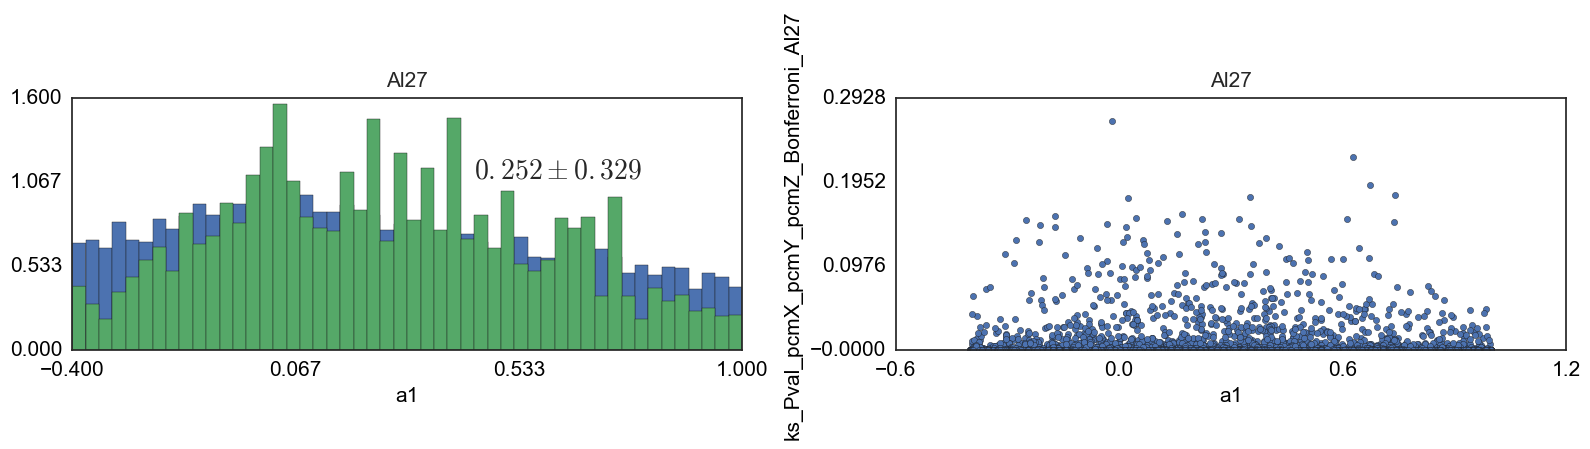

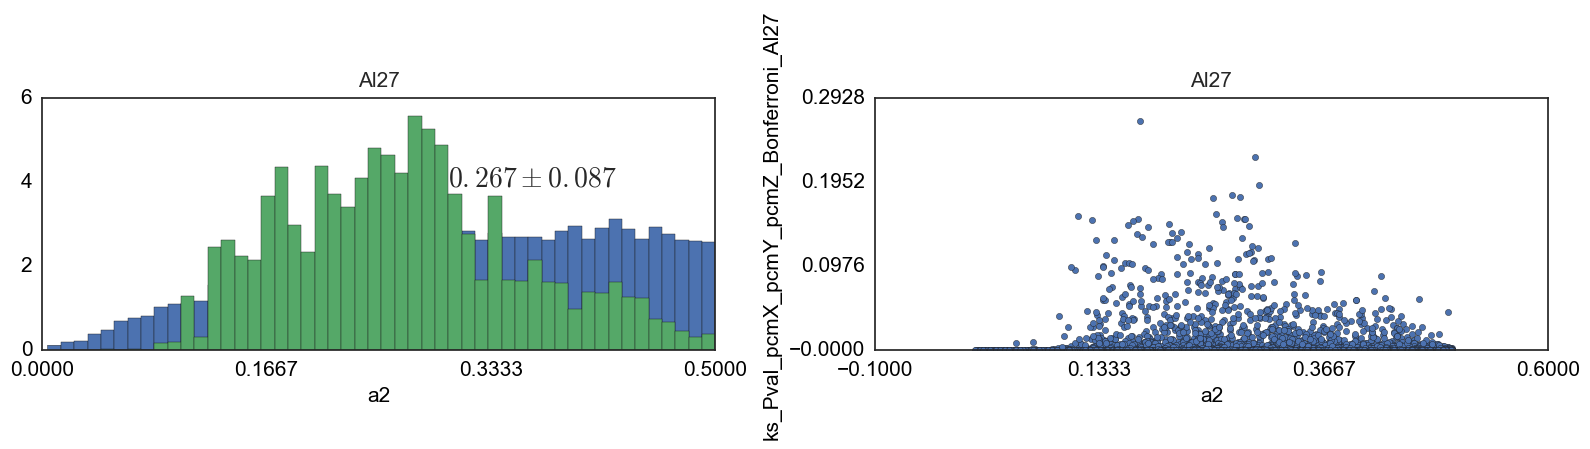

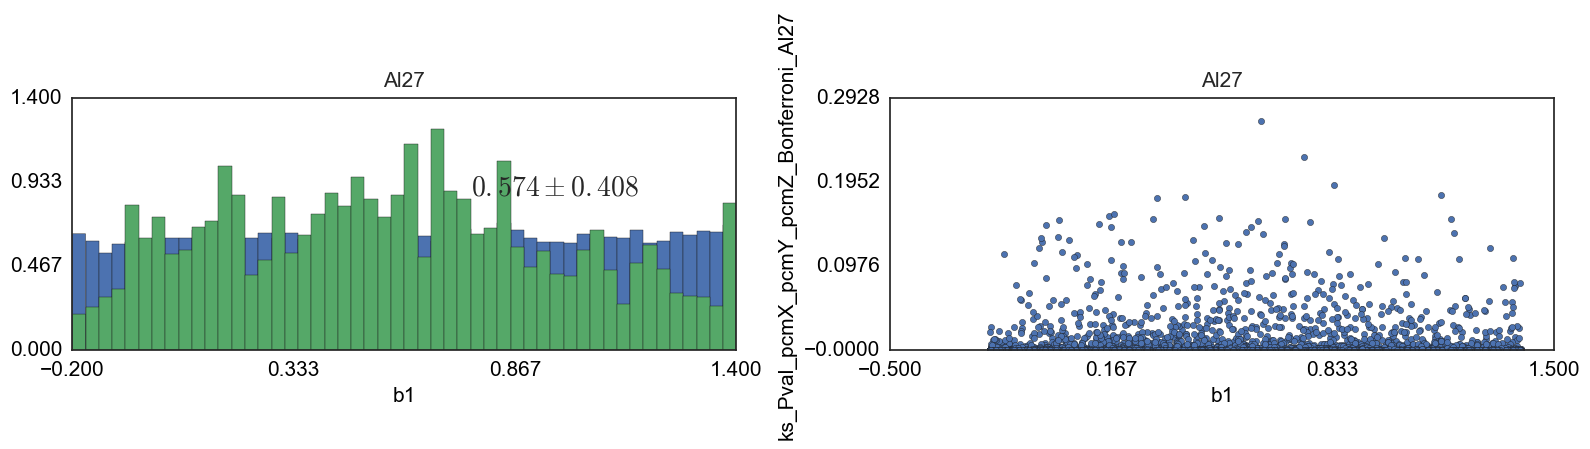

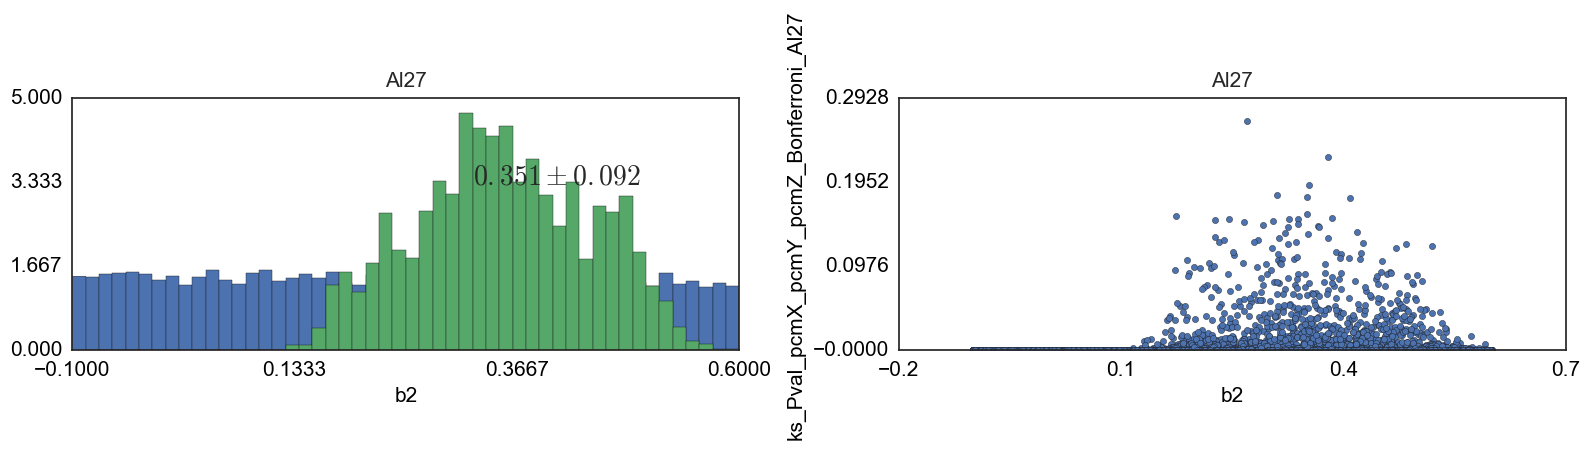

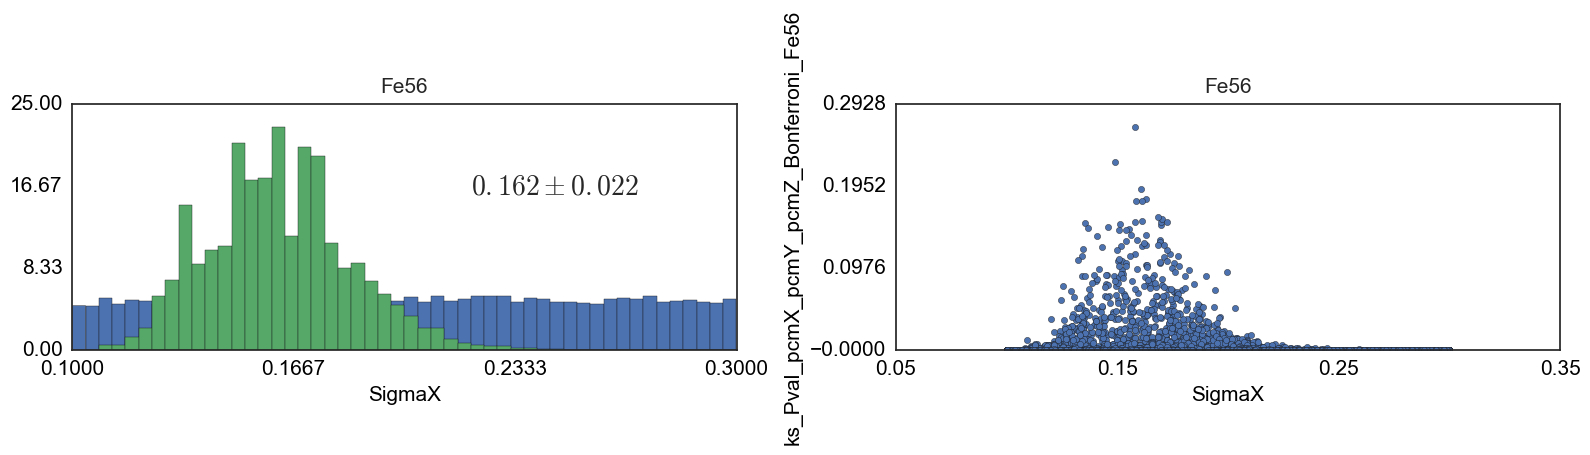

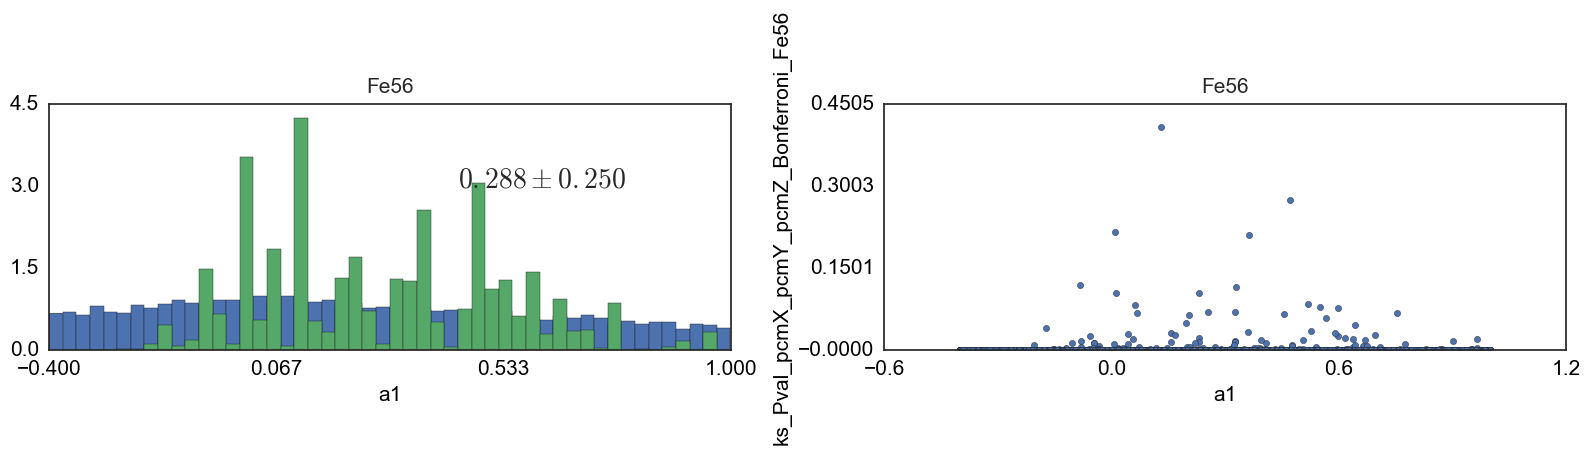

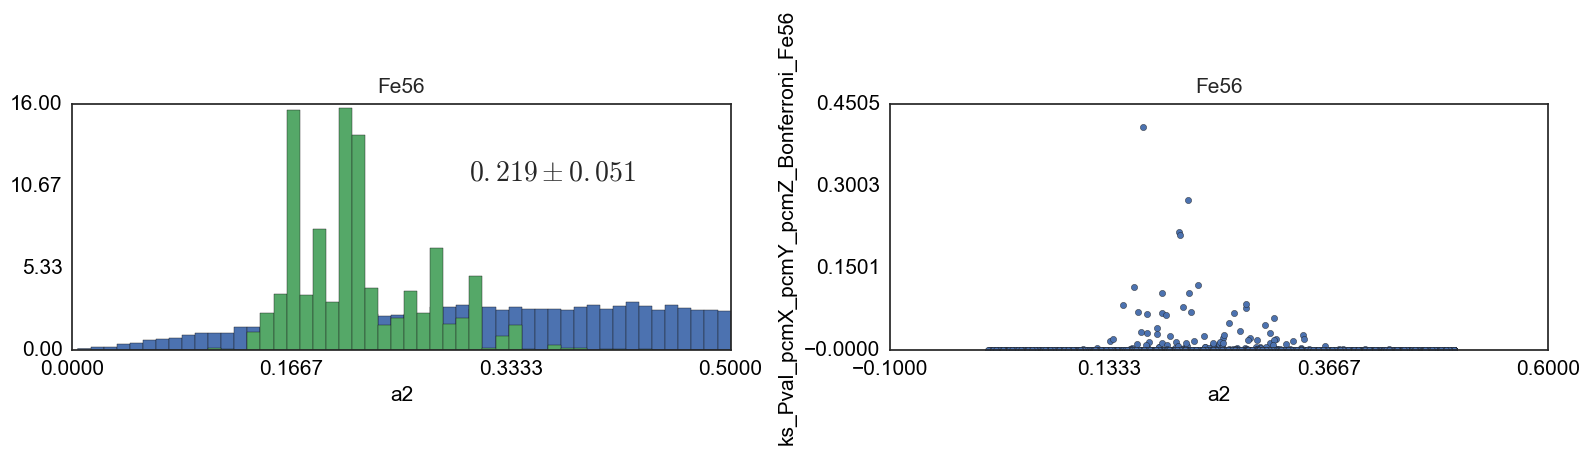

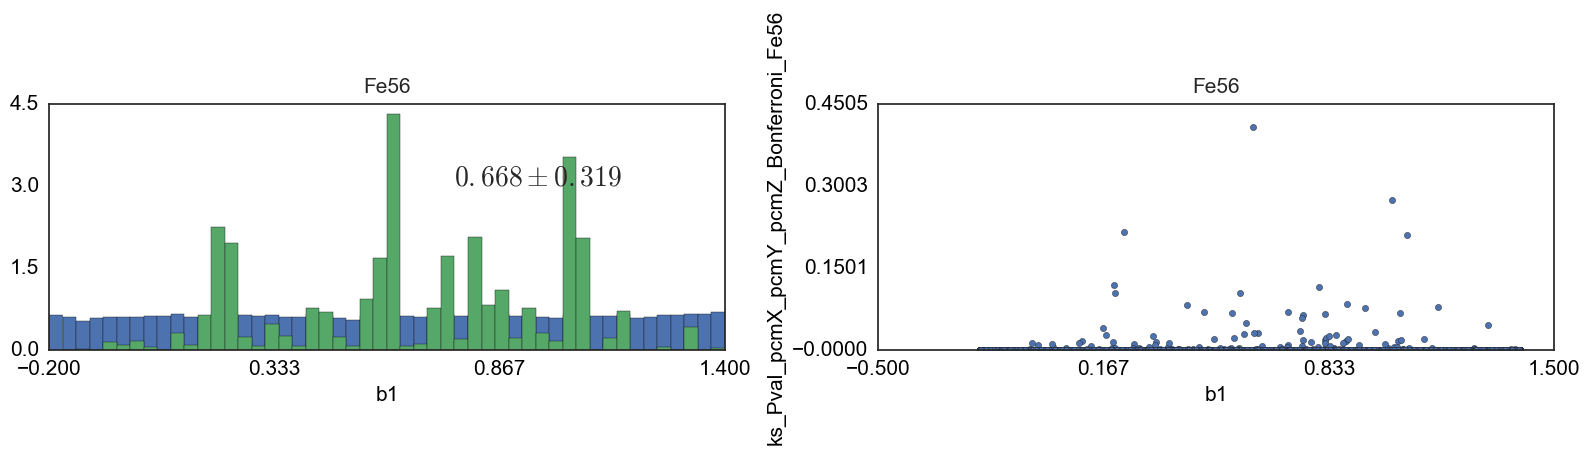

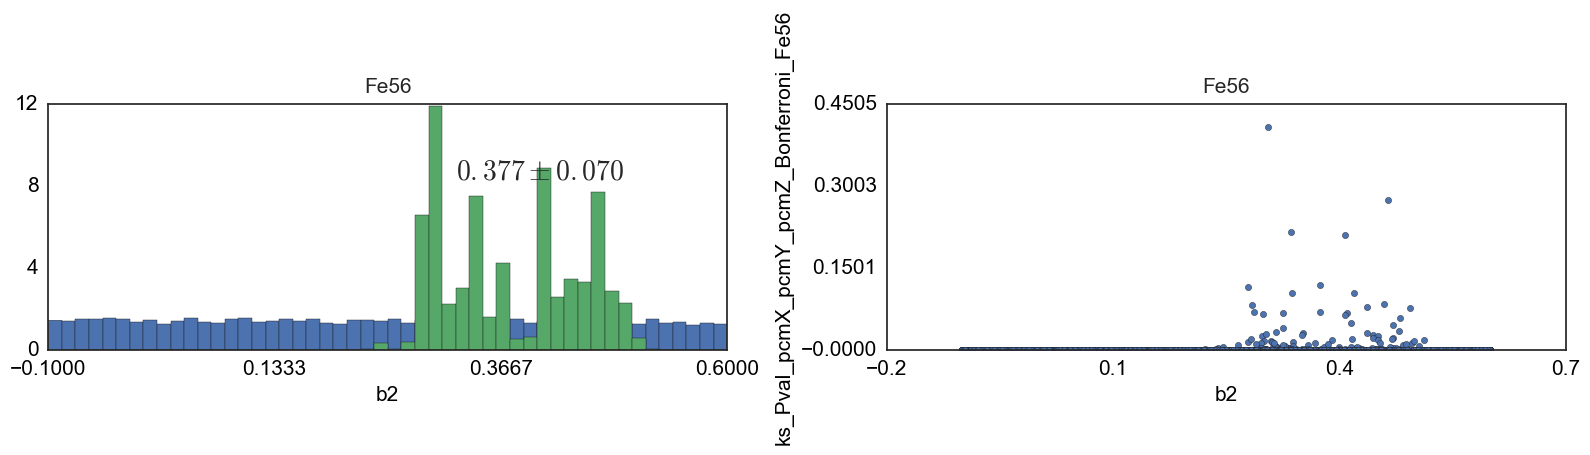

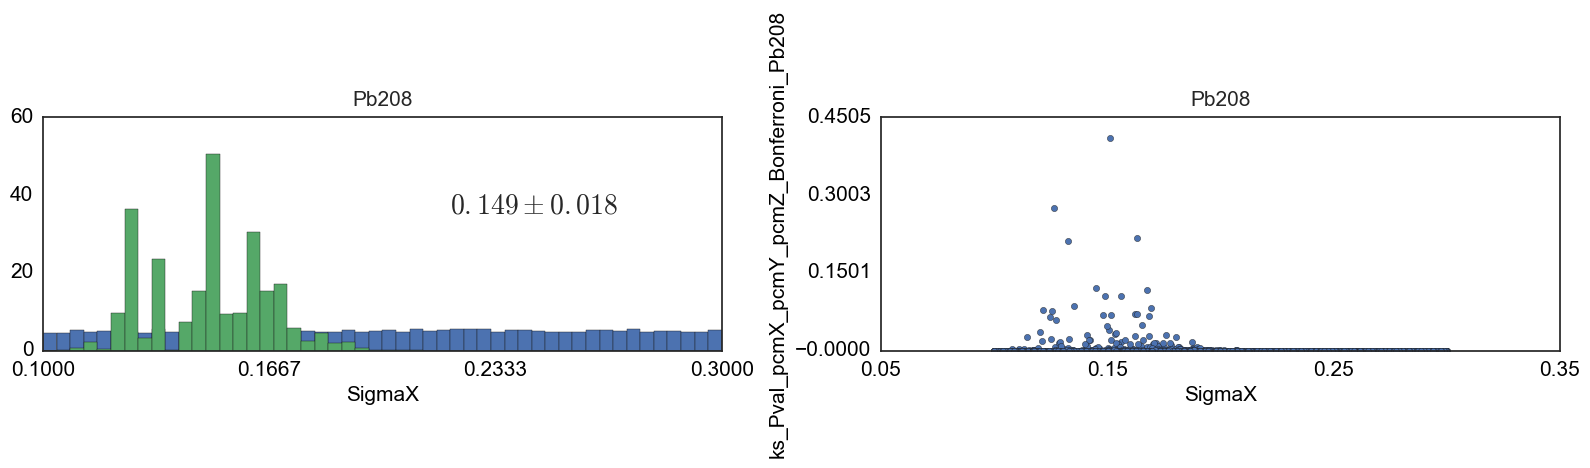

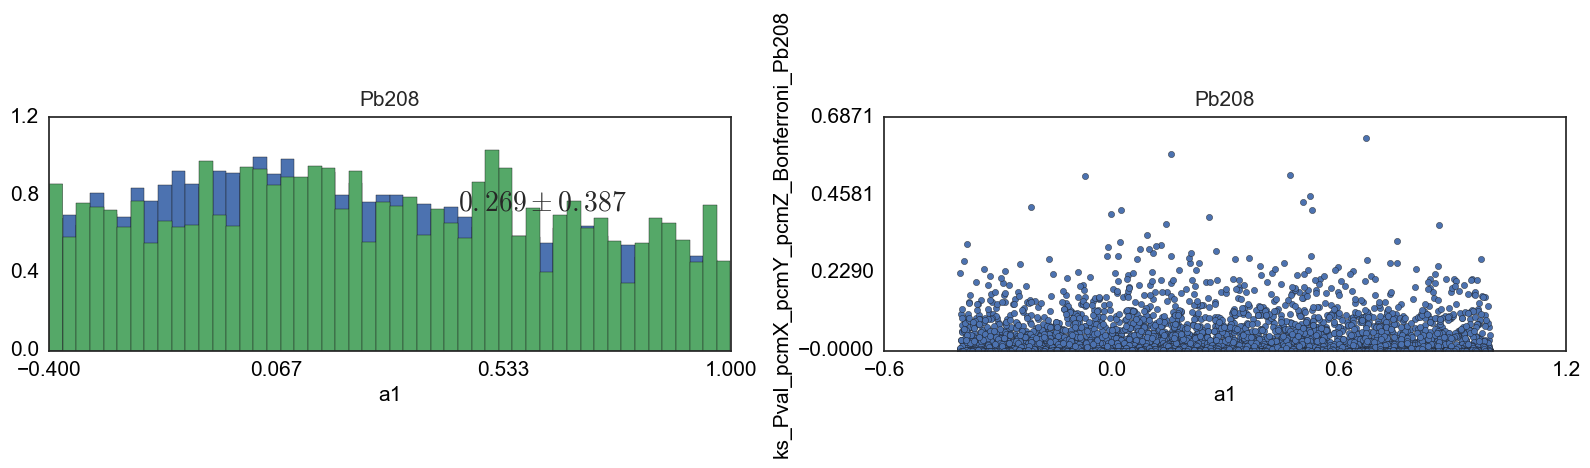

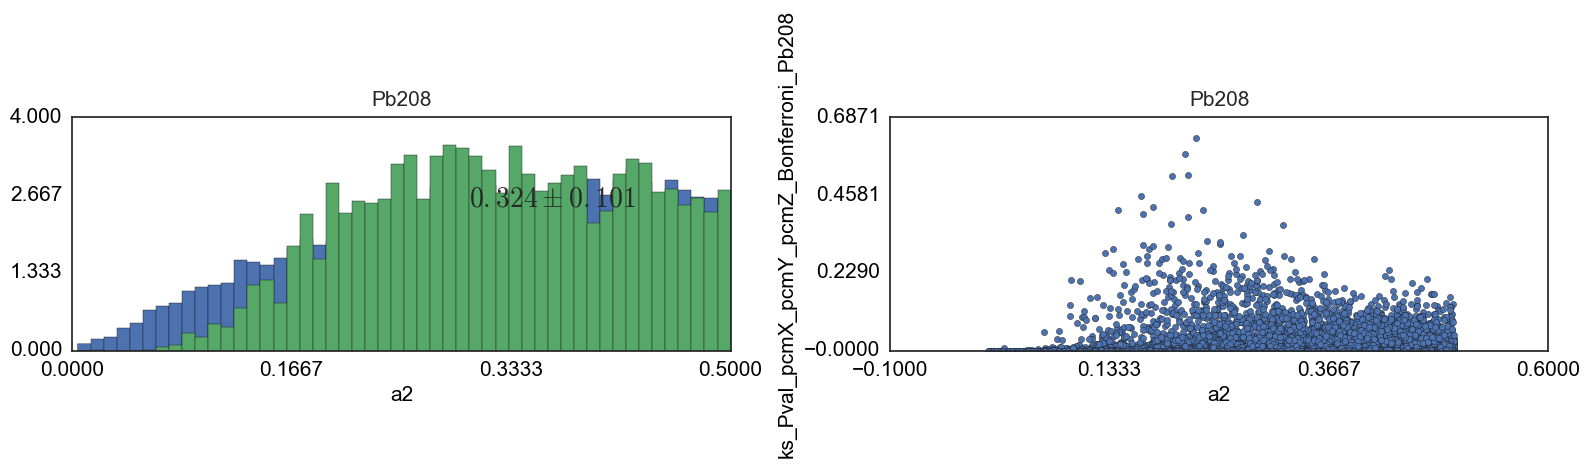

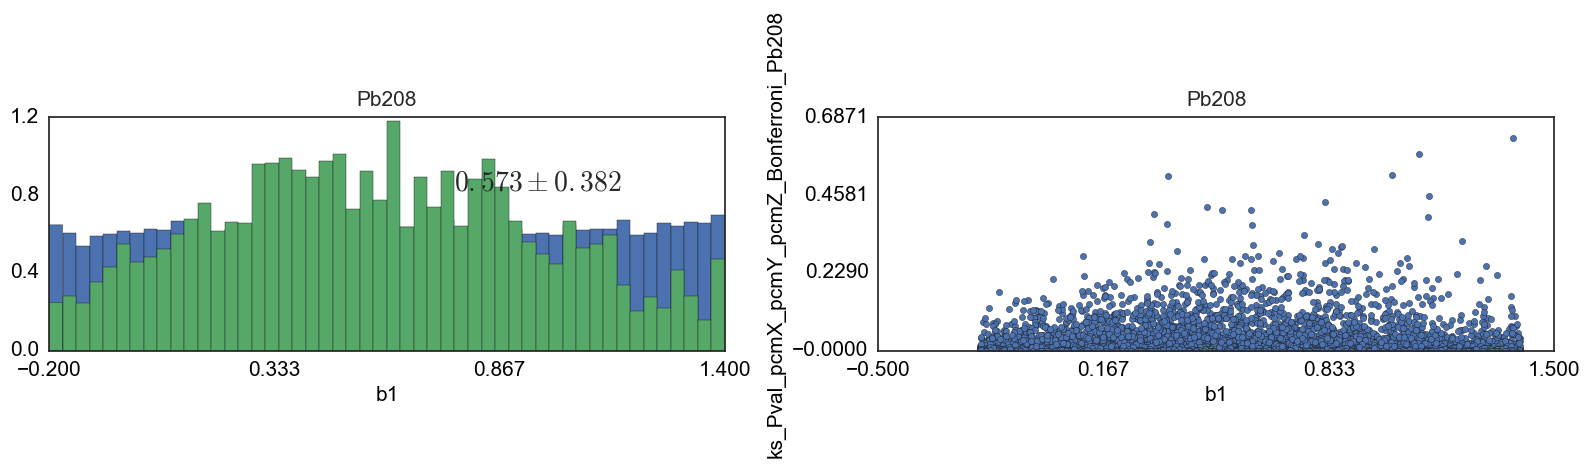

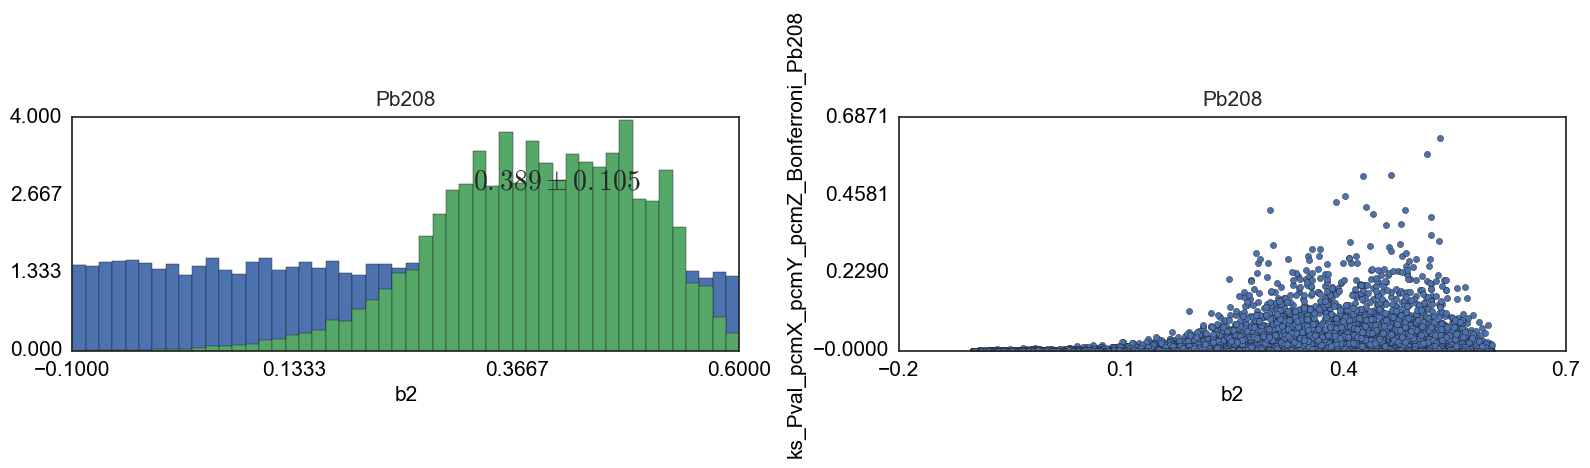

In [158]:
#         'ks_Pval_pcmX_pcmY_pcmZ_'+target,        
#         'ks_Pval_pcmX_pcmY_pcmZ_Bonferroni_'+target,        
#         'ks_Pval_pcmX_pcmY_pcmZ_Ruschendorf_'+target,

for target in ['C12','Al27','Fe56','Pb208']:
    for parameter in ['SigmaX','a1','a2','b1','b2']:
        var = parameter
        weights = sims[w]
        w = 'ks_Pval_pcmX_pcmY_pcmZ_Bonferroni_'+target
        x = sims['gen_'+var]
        fig = plt.figure(figsize=(16,4))
        ax = fig.add_subplot(1,2,1)
        h,bins,_=plt.hist(x,bins=50,normed=1);
        if np.sum(weights)>0:
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1);            
            mu = np.average(sims['gen_'+var] , weights=weights)
            sigma = np.sqrt(np.average((sims['gen_'+var]-mu)**2, weights=weights))                                                                           
        set_axes(ax,x_label=var,fontsize=15)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.text(np.min(bins)+0.6*(np.max(bins)-np.min(bins)),0.7*np.max(h),'$%.3f\\pm%.3f$'%(mu,sigma),fontsize=20)
        ax = fig.add_subplot(1,2,2)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.scatter(x,weights);
        set_axes(ax,x_label=var,y_label=w,fontsize=15)
        ax.set_ylim(np.min(weights)-0.00001,1.1*np.max(weights)+0.00001)
        plt.tight_layout()

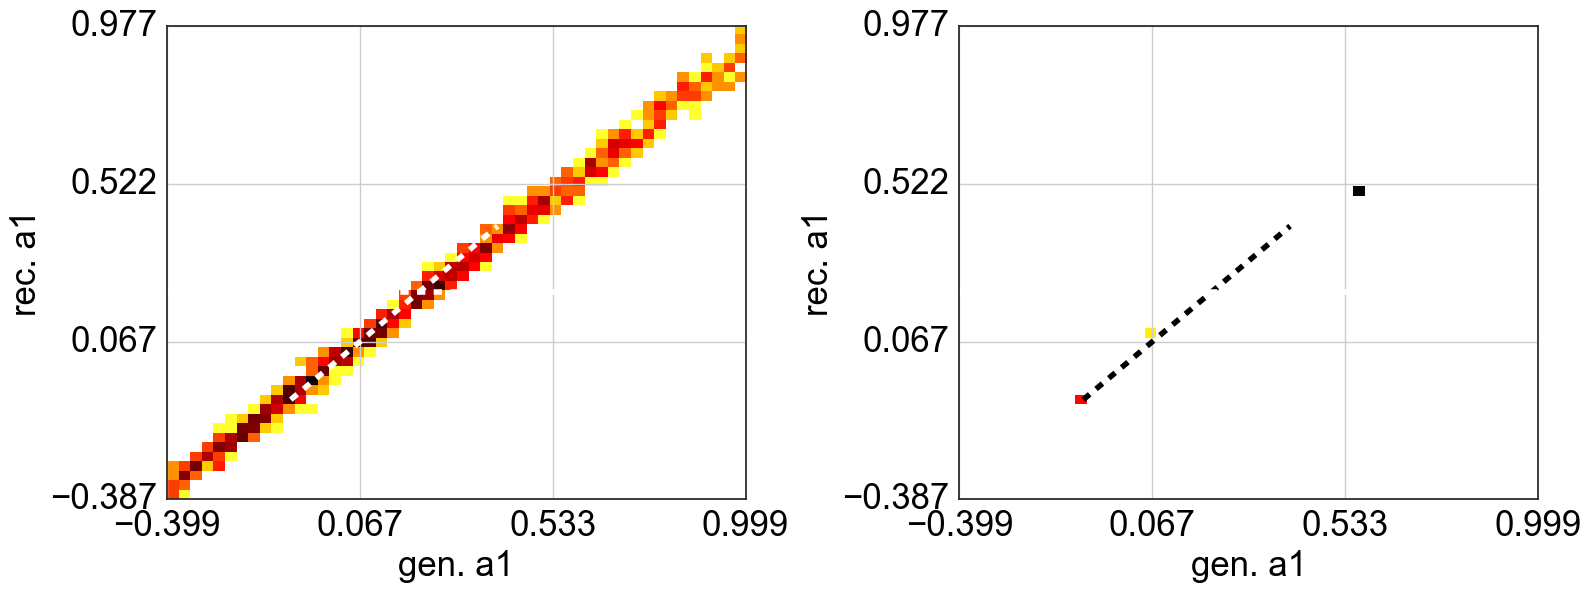

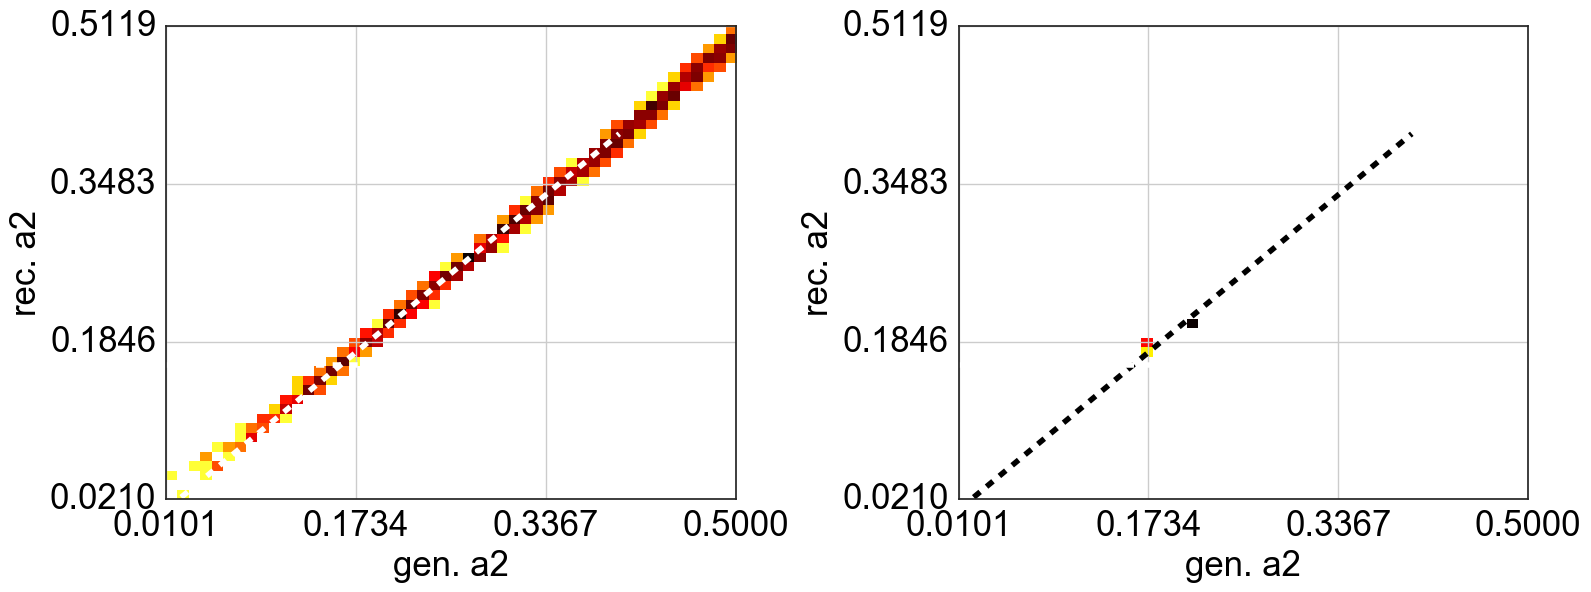

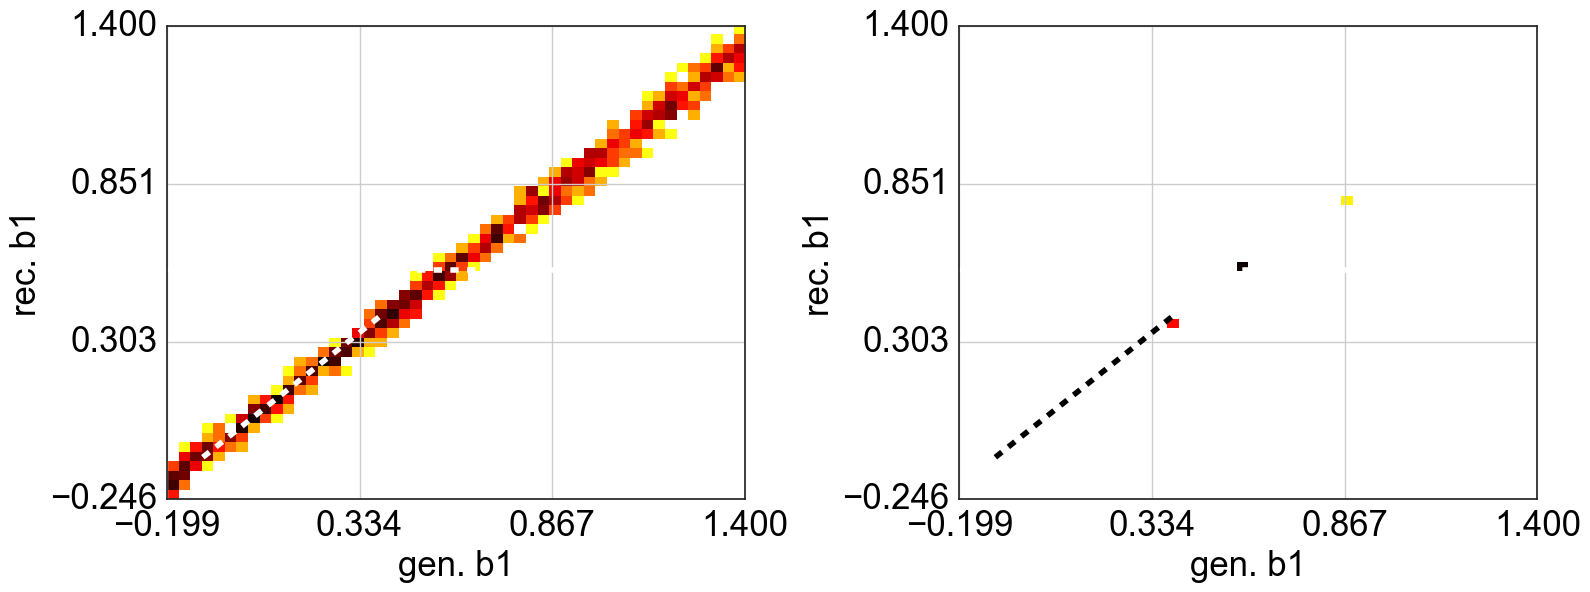

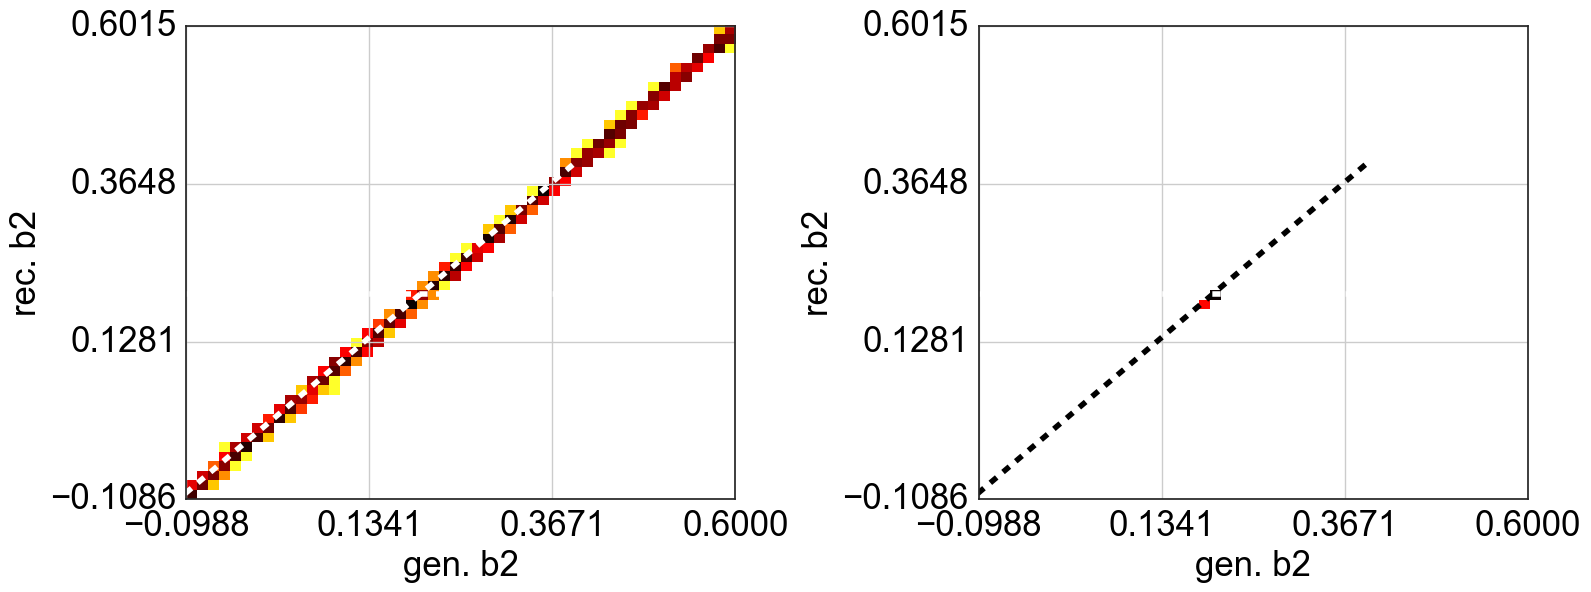

In [240]:
def plot_gen_vs_rec(sample=None,var='b2',data_val=0.2,w='ks_Pval_pcmX_pcmY_pcmZ_Fe56'):
    weights=sample[w]
    fig=plt.figure(figsize=(16,6))
    ax=fig.add_subplot(1,2,1)
    plot_2d_hist(sample['gen_'+var],sample['rec'+var],xlabel='gen. '+var,ylabel='rec. '+var,norm='log',ax=ax);
    ax.plot([-0.1,0.4],[-0.1,0.4],'--',color='white',linewidth=4);
    ax.plot(ax.get_xlim(),[data_val,data_val],'--',color='white',linewidth=4);
    ax.grid()
    ax=fig.add_subplot(1,2,2)
    plot_2d_hist(sample['gen_'+var],sample['rec'+var],xlabel='gen. '+var,ylabel='rec. '+var,norm='log',ax=ax,weights=weights);
    ax.plot([-0.1,0.4],[-0.1,0.4],'--',color='black',linewidth=4);
    ax.plot(ax.get_xlim(),[data_val,data_val],'--',color='white',linewidth=4);
    ax.grid()
    plt.tight_layout()


no_acc_no_fid_no_rec = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_1000_simulationruns_results.csv')
sample = no_acc_no_fid_no_rec

plot_gen_vs_rec(sample=sample,var='a1',data_val=0.21)
plot_gen_vs_rec(sample=sample,var='a2',data_val=0.16)
plot_gen_vs_rec(sample=sample,var='b1',data_val=0.55)
plot_gen_vs_rec(sample=sample,var='b2',data_val=0.2)


# plot_2d_hist(sample['gen_a1'],sample['reca1'],xlabel='gen. a1',ylabel='rec. a1',norm='log');
# plt.plot([-0.2,1.1],[-0.2,1.1],'--',color='white',linewidth=4);

# plot_2d_hist(sample['gen_a2'],sample['reca2'],xlabel='gen. a2',ylabel='rec. a2',norm='log');
# plt.plot([-0.2,1.1],[-0.2,1.1],'--',color='white',linewidth=4);

# plot_2d_hist(sample['gen_b1'],sample['recb1'],xlabel='gen. b1',ylabel='rec. b1',norm='log');
# plt.plot([-0.2,1.1],[-0.2,1.1],'--',color='white',linewidth=4);

# weights=sims['ks_Pval_pcmX_pcmY_pcmZ_Fe56']
# fig=plt.figure(figsize=(16,6))
# ax=fig.add_subplot(1,2,1)
# plot_2d_hist(sims['gen_b2'],sims['recb2'],xlabel='gen. b2',ylabel='rec. b2',norm='log',ax=ax);
# ax.plot([-0.1,0.4],[-0.1,0.4],'--',color='white',linewidth=4);
# ax.plot(ax.get_xlim(),[0.2,0.2],'--',color='white',linewidth=4);
# ax.grid()
# ax=fig.add_subplot(1,2,2)
# plot_2d_hist(sims['gen_b2'],sims['recb2'],xlabel='gen. b2',norm='log',ax=ax,weights=weights);
# ax.plot([-0.1,0.4],[-0.1,0.4],'--',color='black',linewidth=4);
# ax.plot(ax.get_xlim(),[0.2,0.2],'--',color='white',linewidth=4);
# ax.grid()
# plt.tight_layout()
# plot_2d_hist(sims['gen_b2'],sims['gen_SigmaX'],xlabel='b2',ylabel='SigmaX',weights=weights,norm='log');

0 SigmaX vs. a1
1 SigmaX vs. a2
2 SigmaX vs. b1
3 SigmaX vs. b2
4 a1 vs. a2
5 b1 vs. b2
0 SigmaX vs. a1
1 SigmaX vs. a2
2 SigmaX vs. b1
3 SigmaX vs. b2
4 a1 vs. a2
5 b1 vs. b2
0 SigmaX vs. a1
1 SigmaX vs. a2
2 SigmaX vs. b1
3 SigmaX vs. b2
4 a1 vs. a2
5 b1 vs. b2
0 SigmaX vs. a1
1 SigmaX vs. a2
2 SigmaX vs. b1
3 SigmaX vs. b2
4 a1 vs. a2
5 b1 vs. b2


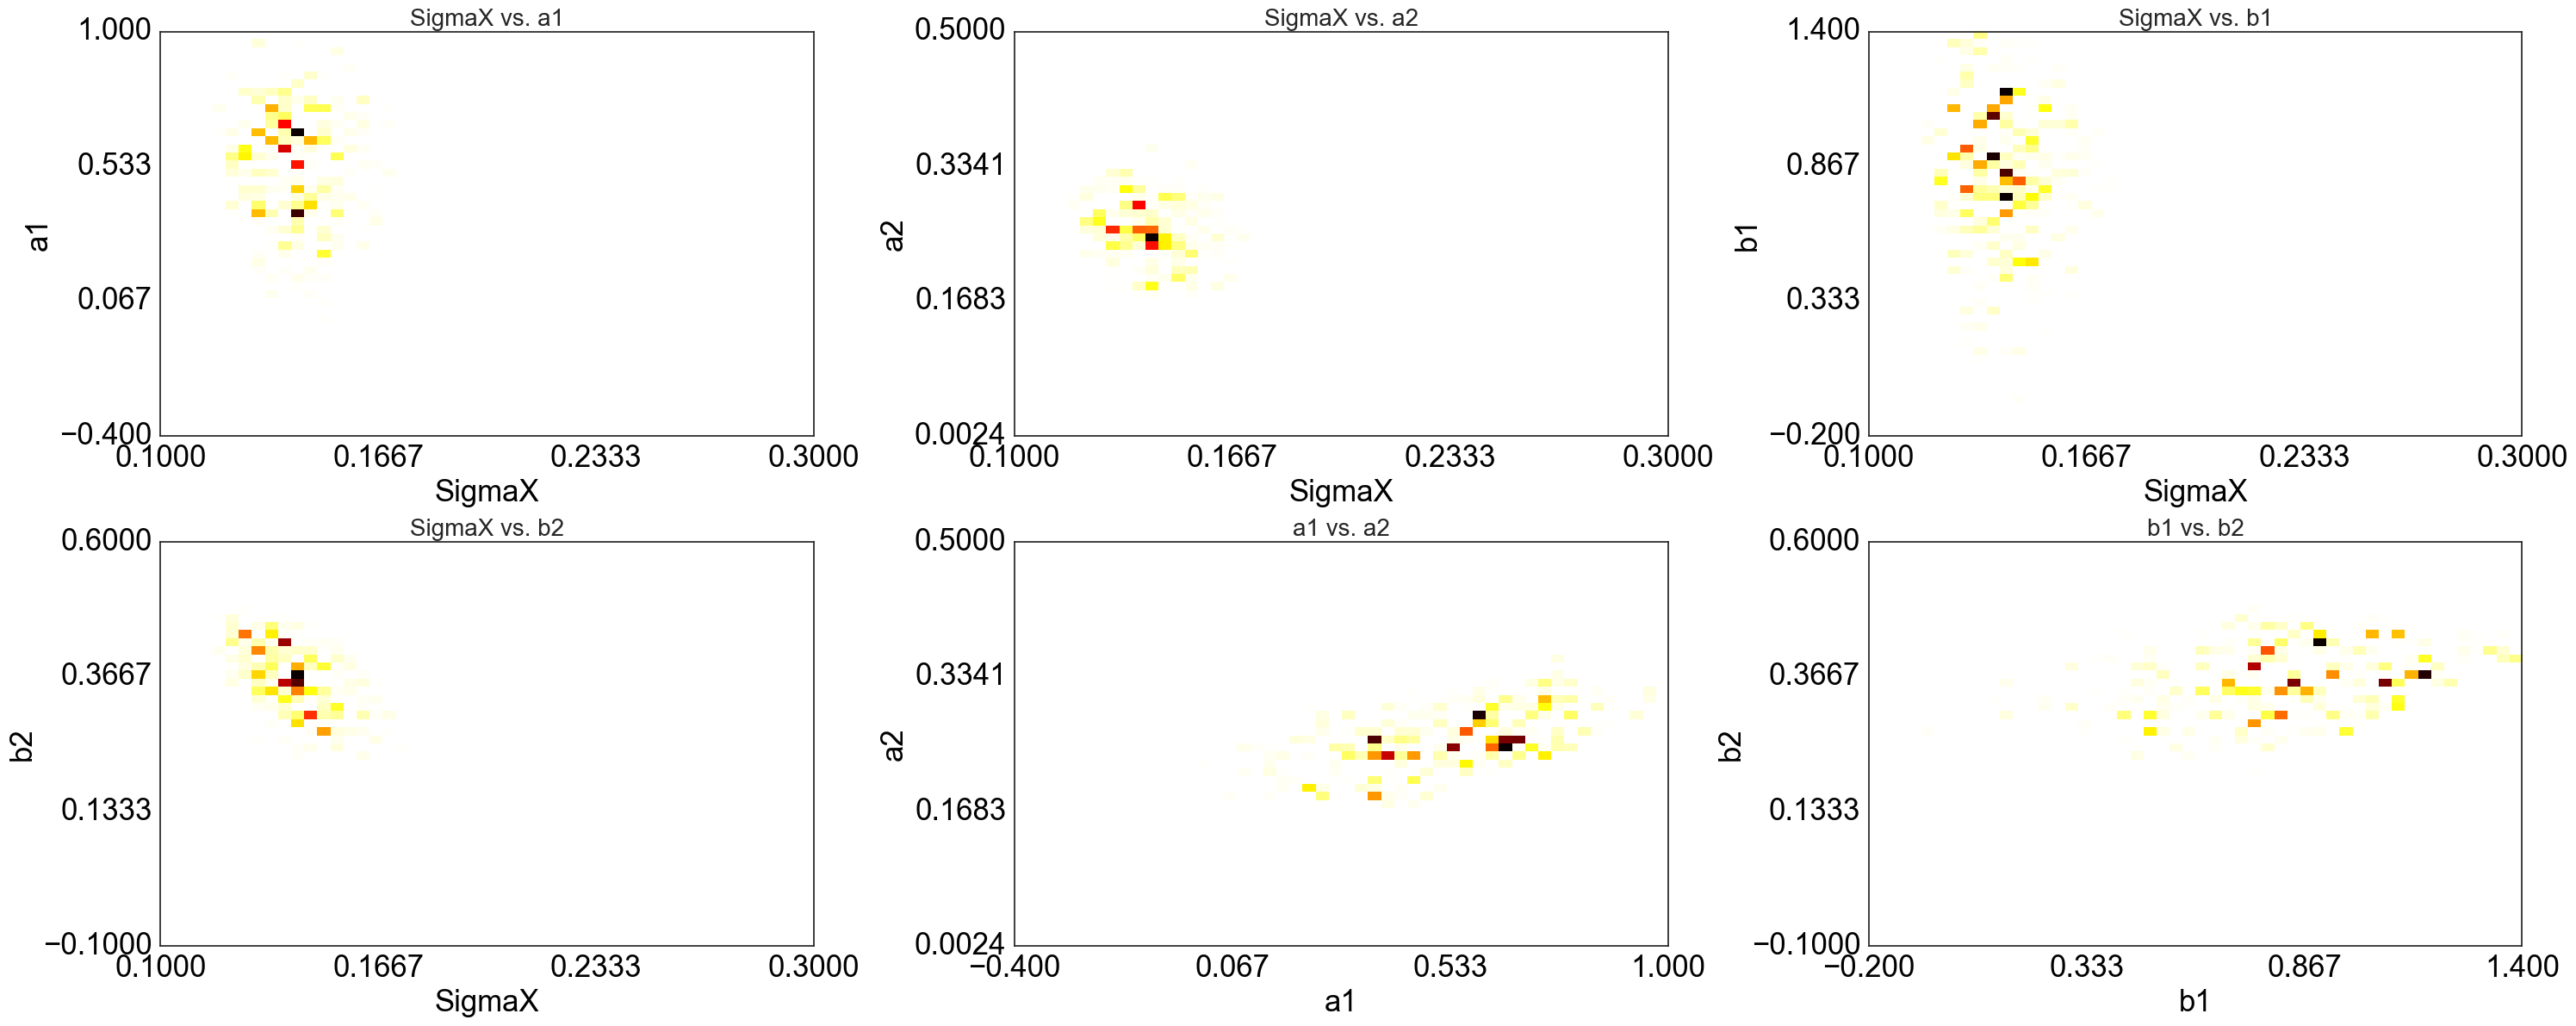

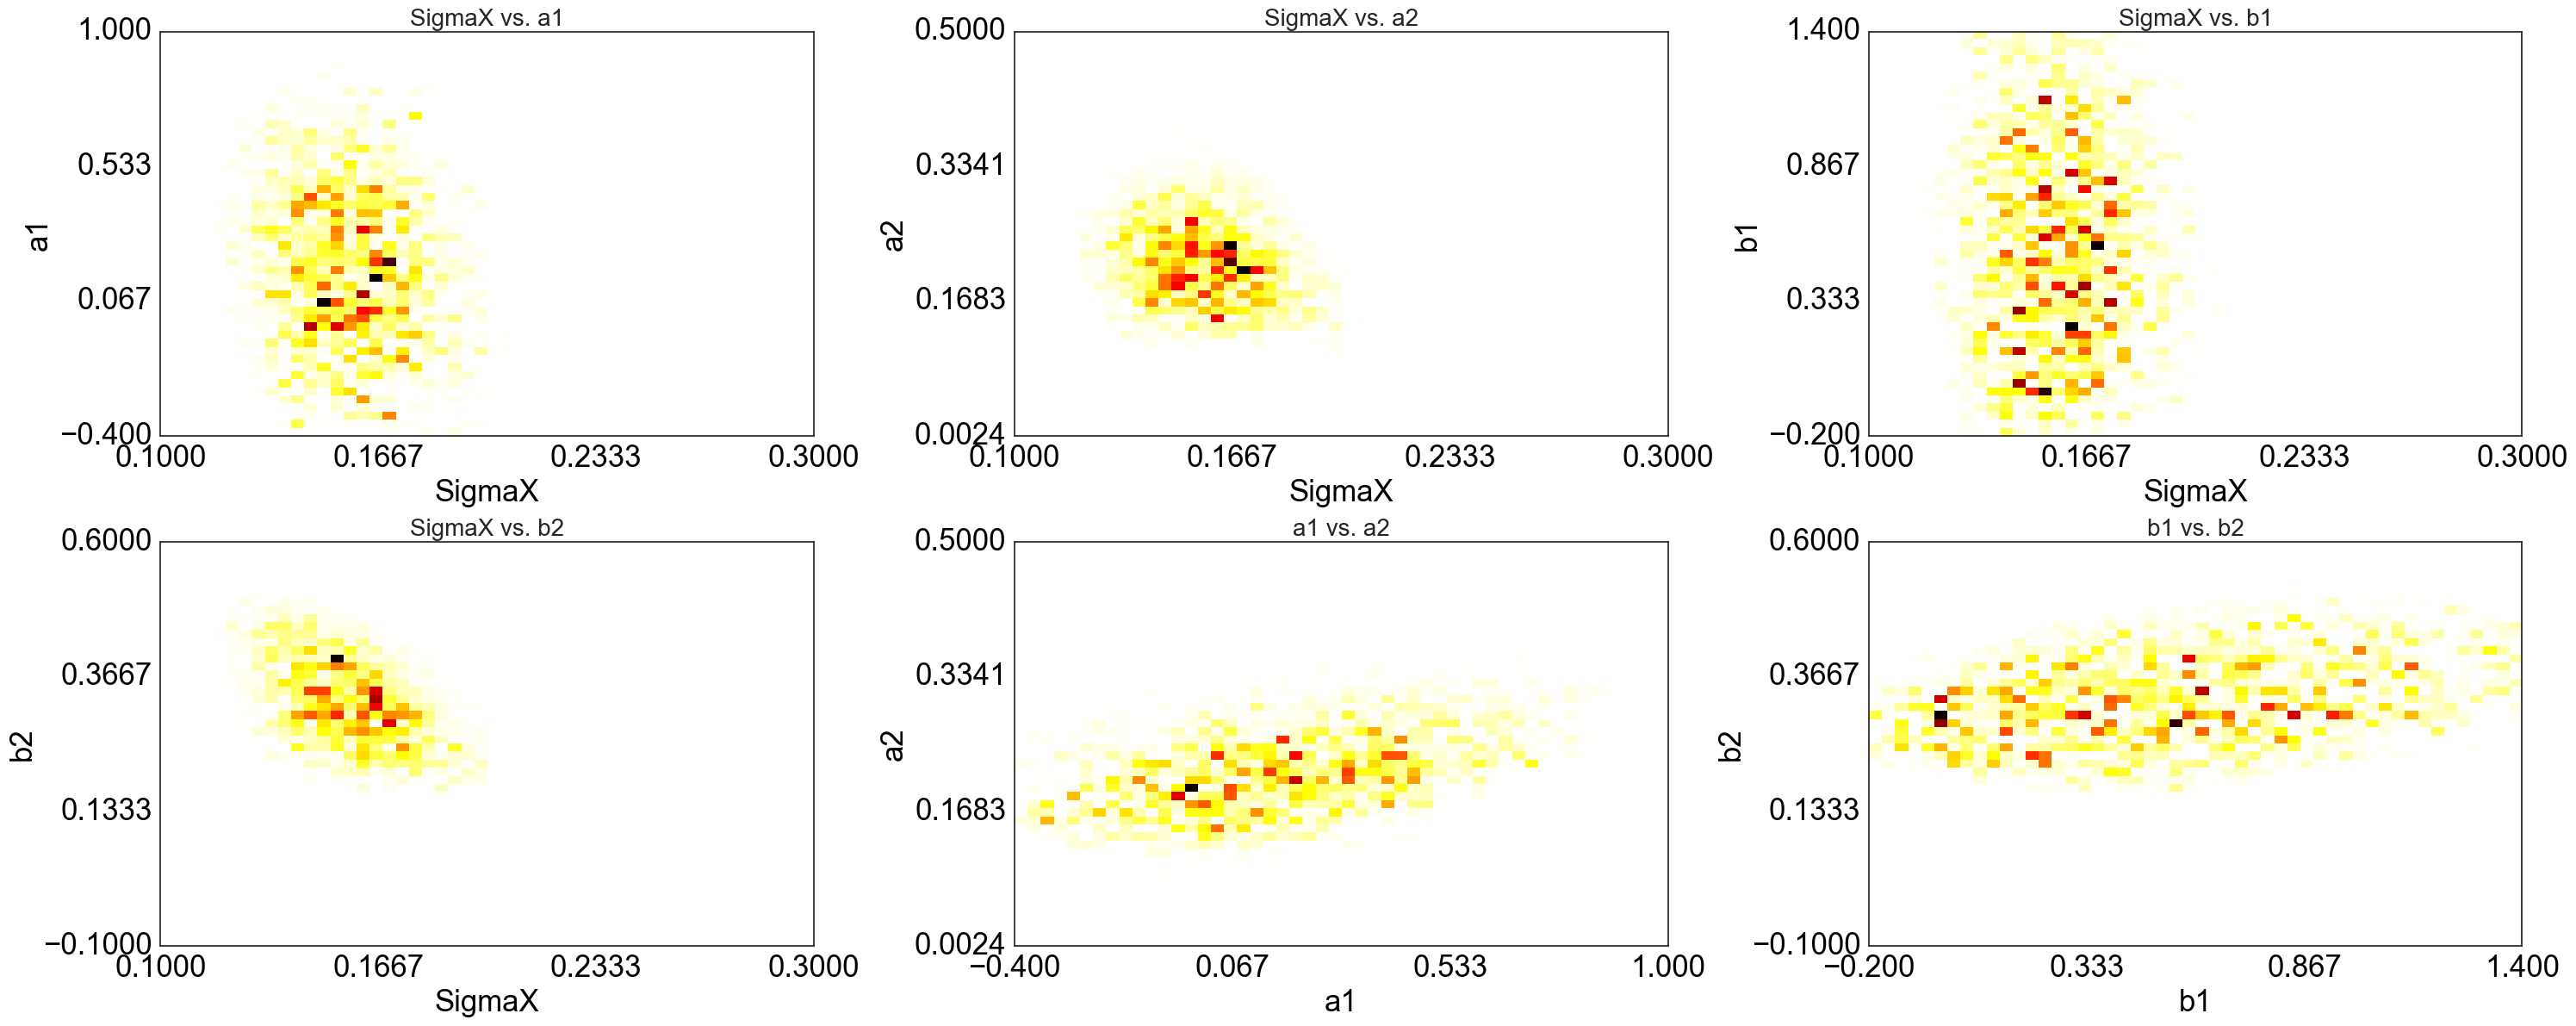

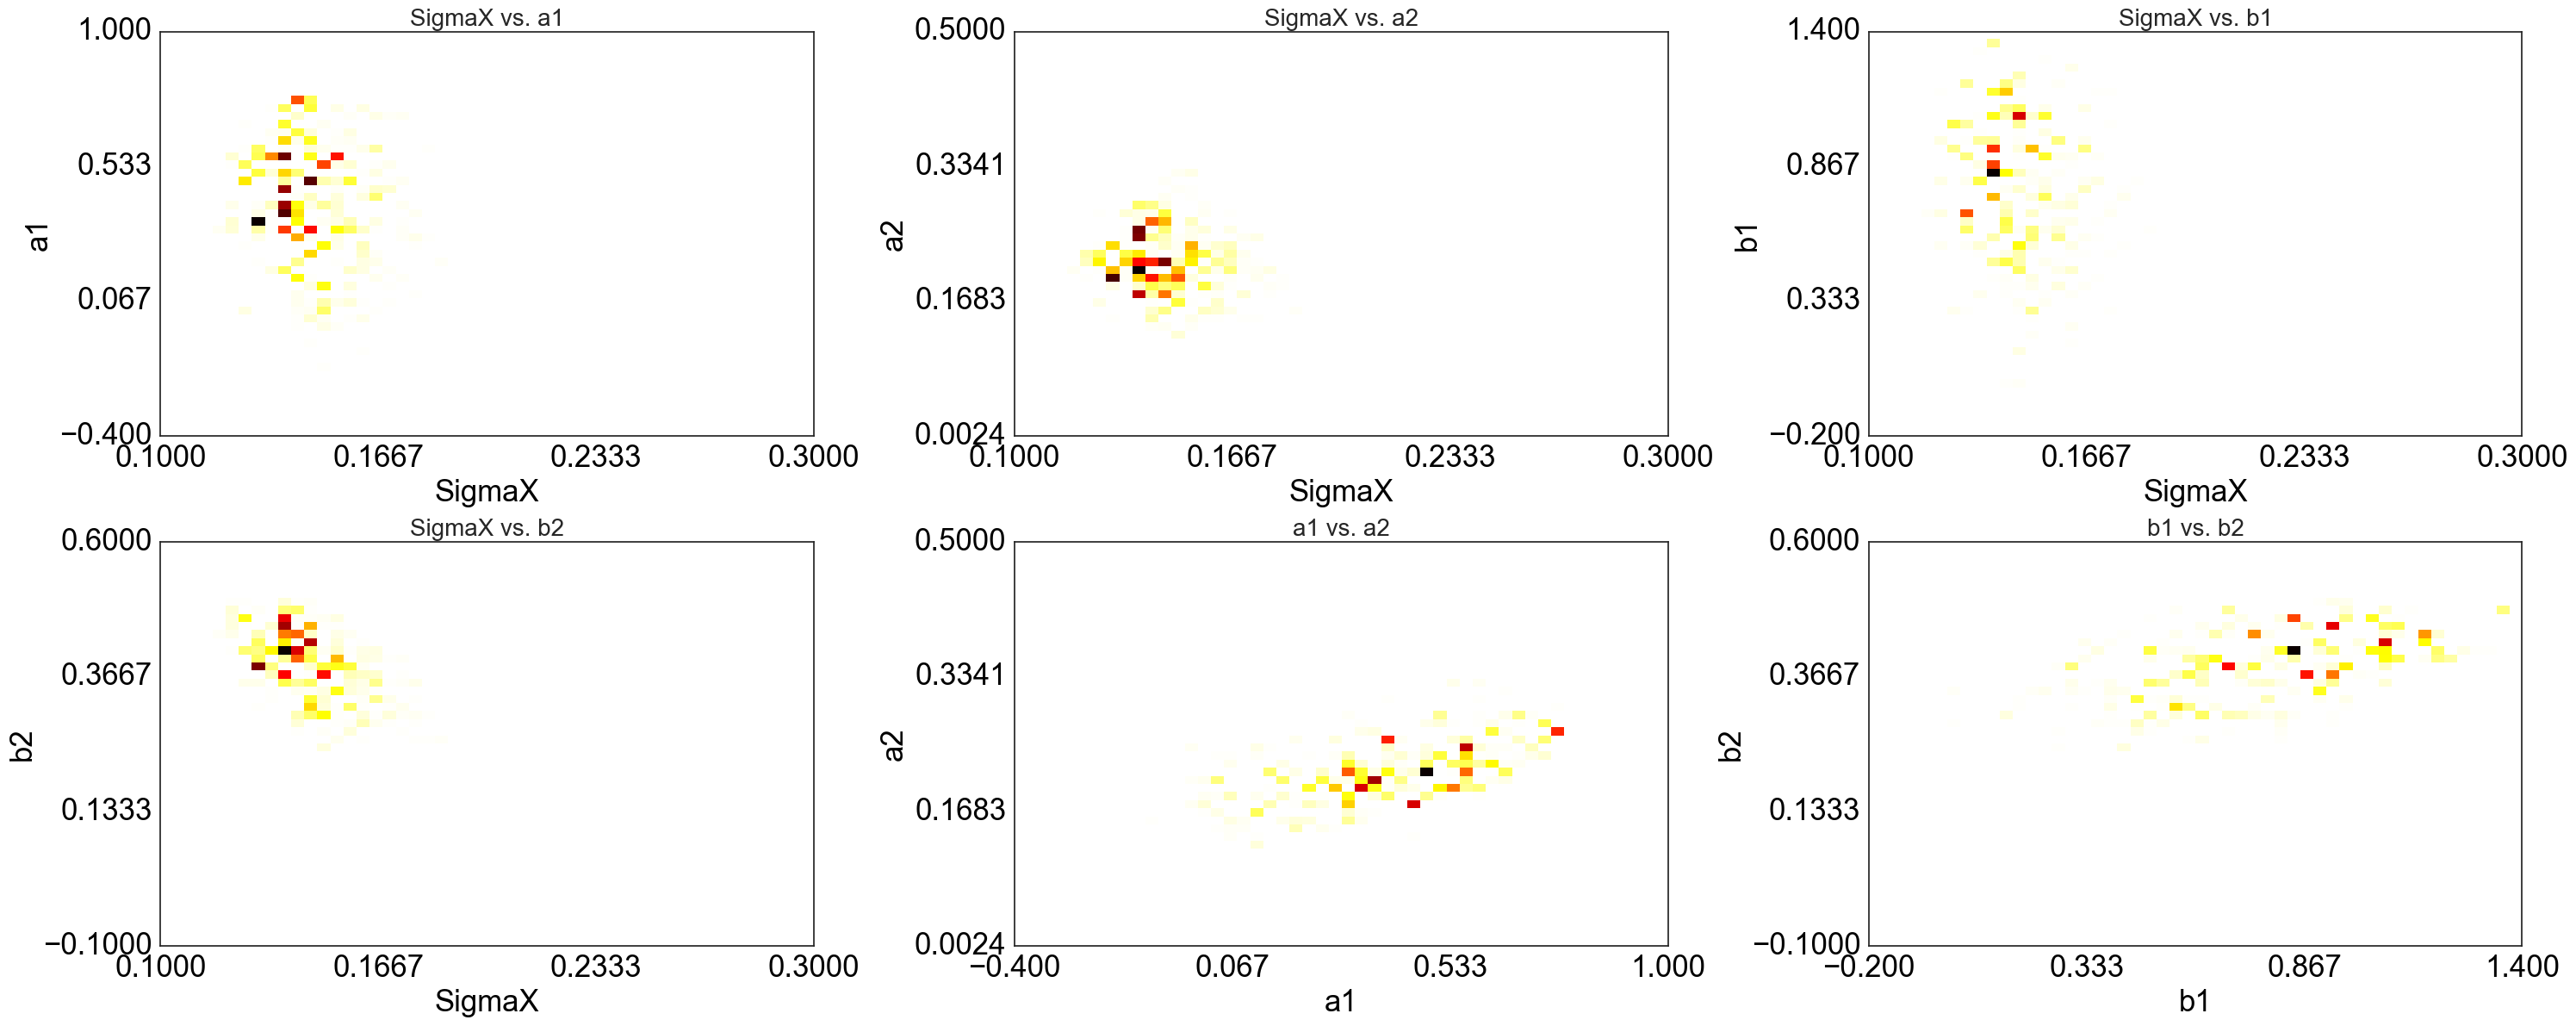

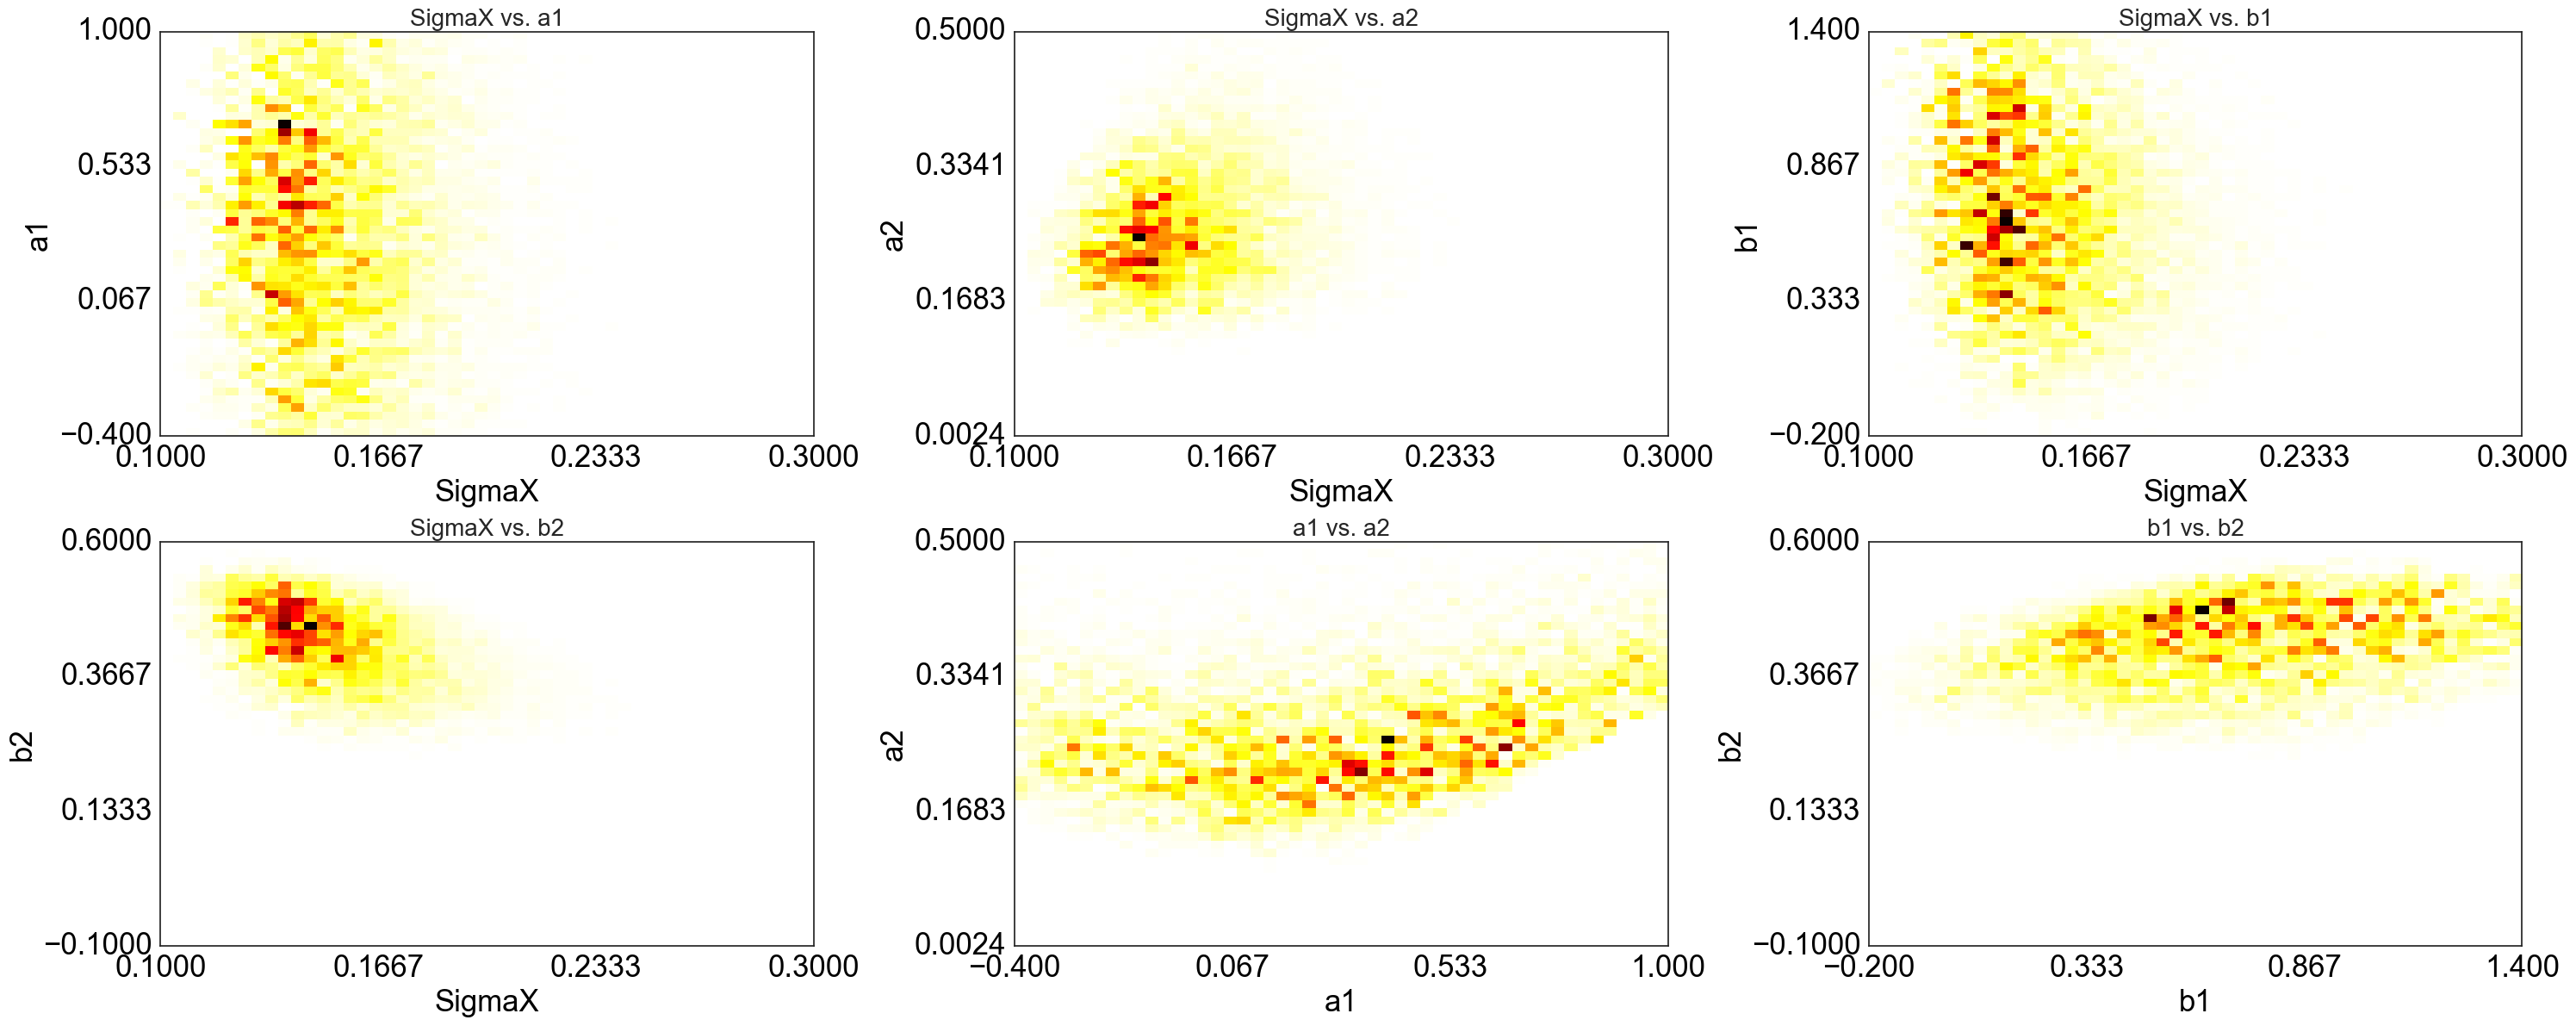

In [203]:
sample = sims#[sims['gen_b2']<0.25]

for target in ['C12','Al27','Fe56','Pb208']:    
    weights=sample['ks_Pval_pcmX_pcmY_pcmZ_'+target]
#     weights=sample['ks_Pval_pcmX_pcmY_pcmZ_Bonferroni_'+target]        
#     weights=sample['ks_Pval_pcmX_pcmY_pcmZ_Ruschendorf_'+target]

    fig = plt.figure(figsize=(30,12))
    for i,parameter_i,parameter_j in zip(range(6)
                                               ,['SigmaX','SigmaX','SigmaX','SigmaX','a1','b1']
                                               ,['a1','a2','b1','b2','a2','b2']):
        print i,parameter_i + ' vs. ' + parameter_j
        ax = fig.add_subplot(2 ,3 , i+1)
        ax.set_title(parameter_i + ' vs. ' + parameter_j,fontsize=20)
        plot_2d_hist(sample['gen_'+parameter_i],sample['gen_'+parameter_j],weights=weights
                     ,xlabel=parameter_i,ylabel=parameter_j,ax=ax);
    plt.tight_layout()

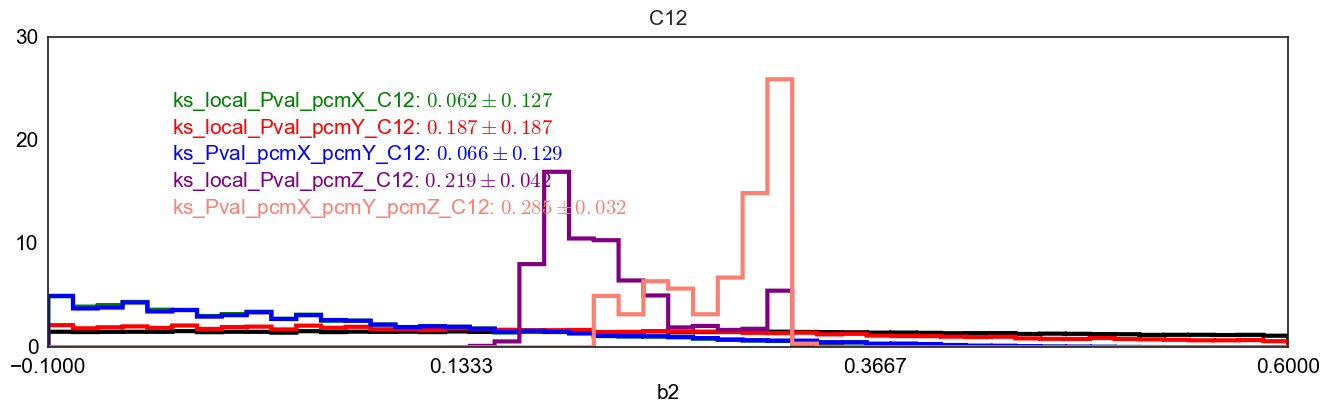

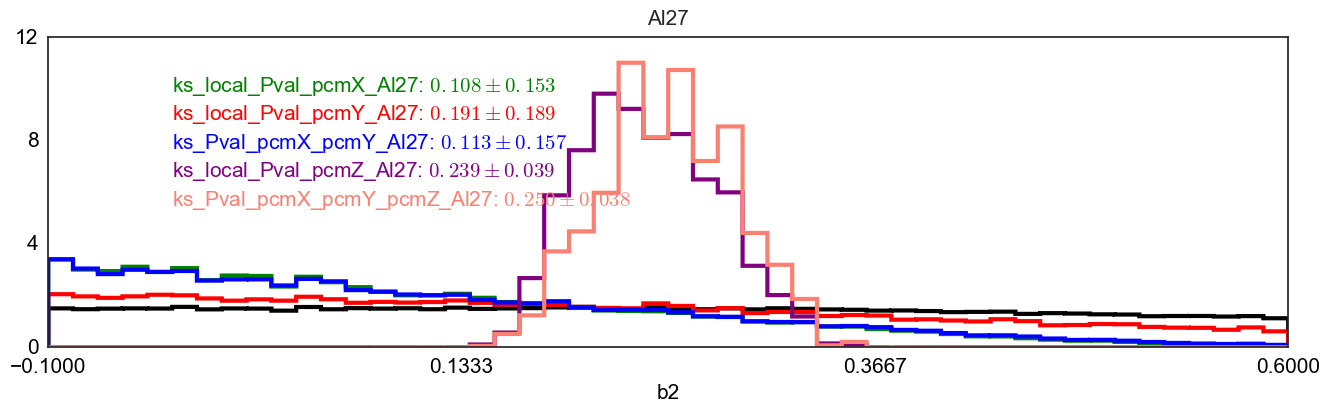

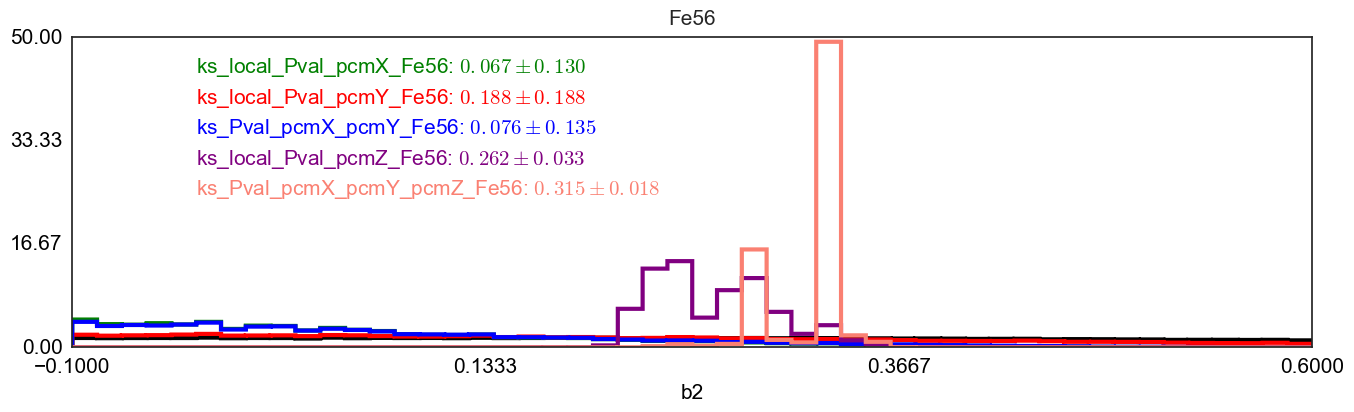

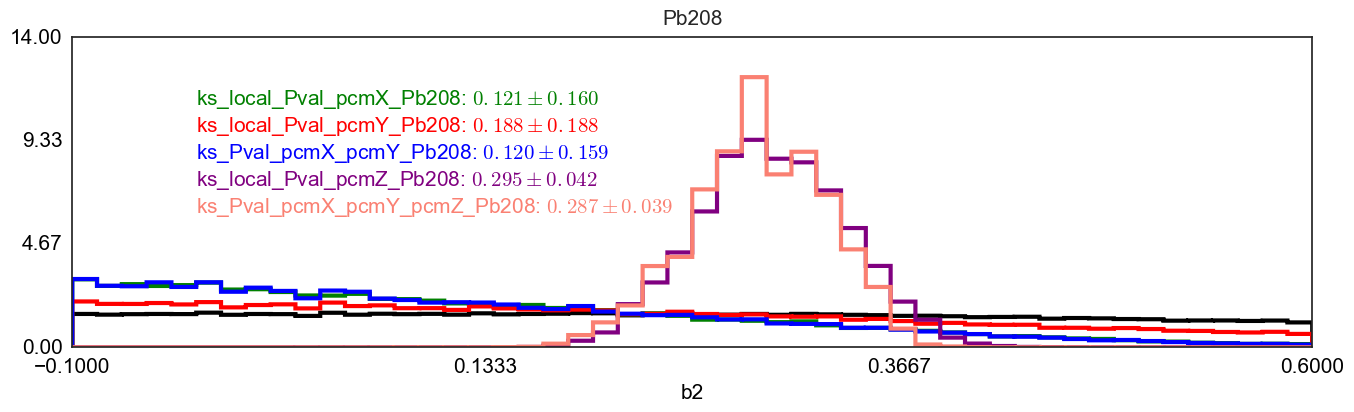

In [240]:
# sample = sims
for target in ['C12','Al27','Fe56','Pb208']:    
    fig,ax = plt.subplots(figsize=(16,4))
    parameter = 'b2'
    x = sample['gen_'+parameter]
    h,bins,_=plt.hist(x,bins=50,normed=1,histtype='step',linewidth=3,color='black')
    weights_array = ['ks_local_Pval_pcmX_'+target,'ks_local_Pval_pcmY_'+target,'ks_Pval_pcmX_pcmY_'+target,'ks_local_Pval_pcmZ_'+target,'ks_Pval_pcmX_pcmY_pcmZ_'+target]
    colors = ['green','red','blue','purple','salmon','black','cyan','yellow']
    y_max,mu,sigma=0,[],[]
    for i,weights_name,color in zip(range(len(weights_array)),weights_array,colors):
        weights = sample[weights_name]
        if np.sum(weights)>0:
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1,histtype='step',linewidth=3,color=color);
            if np.max(h)>y_max: y_max=np.max(h)
            mu.append(np.average(x , weights=weights))
            sigma.append(np.sqrt(np.average((x-mu[-1])**2, weights=weights)))
    for i,weights_name,color in zip(range(len(mu)),weights_array,colors):
        plt.text(np.min(bins)+0.1*(np.max(bins)-np.min(bins)),(1-0.1*(i+1))*y_max,weights_name+': $%.3f\\pm%.3f$'%(mu[i],sigma[i]),fontsize=15,color=color)

    set_axes(ax,x_label=parameter,fontsize=15)
    ax.set_title(target,fontsize=15,y=1.02)    

In [215]:
cm_pars['C12']

,EvtsInBin,good_bin,mean_tErr_unweighted,mean_tErr_weighted,mean_t_unweighted,mean_t_weighted,mean_xErr_unweighted,mean_xErr_weighted,mean_x_unweighted,mean_x_weighted,...,sigma_x_unweighted,sigma_x_weighted,sigma_yErr_unweighted,sigma_yErr_weighted,sigma_y_unweighted,sigma_y_weighted,sigma_zErr_unweighted,sigma_zErr_weighted,sigma_z_unweighted,sigma_z_weighted
0,71,True,0.014444,0.014444,0.203972,0.203972,0.020623,0.020623,-0.005411,-0.005411,...,0.173788,0.173788,0.013391,0.013391,0.159660,0.159660,0.012941,0.012941,0.154164,0.154164
1,143,True,0.008821,0.008899,0.191048,0.192069,0.012318,0.012456,-0.037495,-0.036376,...,0.147308,0.147911,0.009184,0.009313,0.155351,0.156437,0.007859,0.007951,0.132934,0.133533
2,132,True,0.010388,0.010194,0.226333,0.223975,0.015259,0.015279,-0.012516,-0.010800,...,0.175321,0.174892,0.011434,0.011226,0.185864,0.181792,0.009643,0.009687,0.156736,0.156849
3,96,True,0.011044,0.011028,0.197337,0.195628,0.016787,0.016942,-0.008092,-0.008941,...,0.164495,0.165145,0.011060,0.010877,0.153227,0.149889,0.012114,0.012219,0.167935,0.168496
4,56,True,0.014849,0.015344,0.231434,0.232065,0.022118,0.022452,-0.025600,-0.027392,...,0.165535,0.165006,0.018321,0.018837,0.194256,0.195978,0.022976,0.023555,0.240952,0.243135


In [18]:
f1 = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/SRC_e1_C.root' )
p1 = f1.Get('T')
f2 = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/SRC_e2_C.root' )
p2 = f2.Get('T')
# p2 = TPlots(path + '/DATA/SRC_e2_C.root' , 'T')
evtsgen_PmissBins = []
for i in range(5):
    pmin , pmax = PmissBins[i][0] , PmissBins[i][1]
    p_cut = ("%f<Pmiss_size && Pmiss_size<%f"%(pmin , pmax))
    evtsgen_PmissBins.append( 20. * (p1.GetEntries(p_cut) + p2.GetEntries(p_cut)) )
    print evtsgen_PmissBins[-1]

93540.0
49820.0
31620.0
15200.0
9160.0


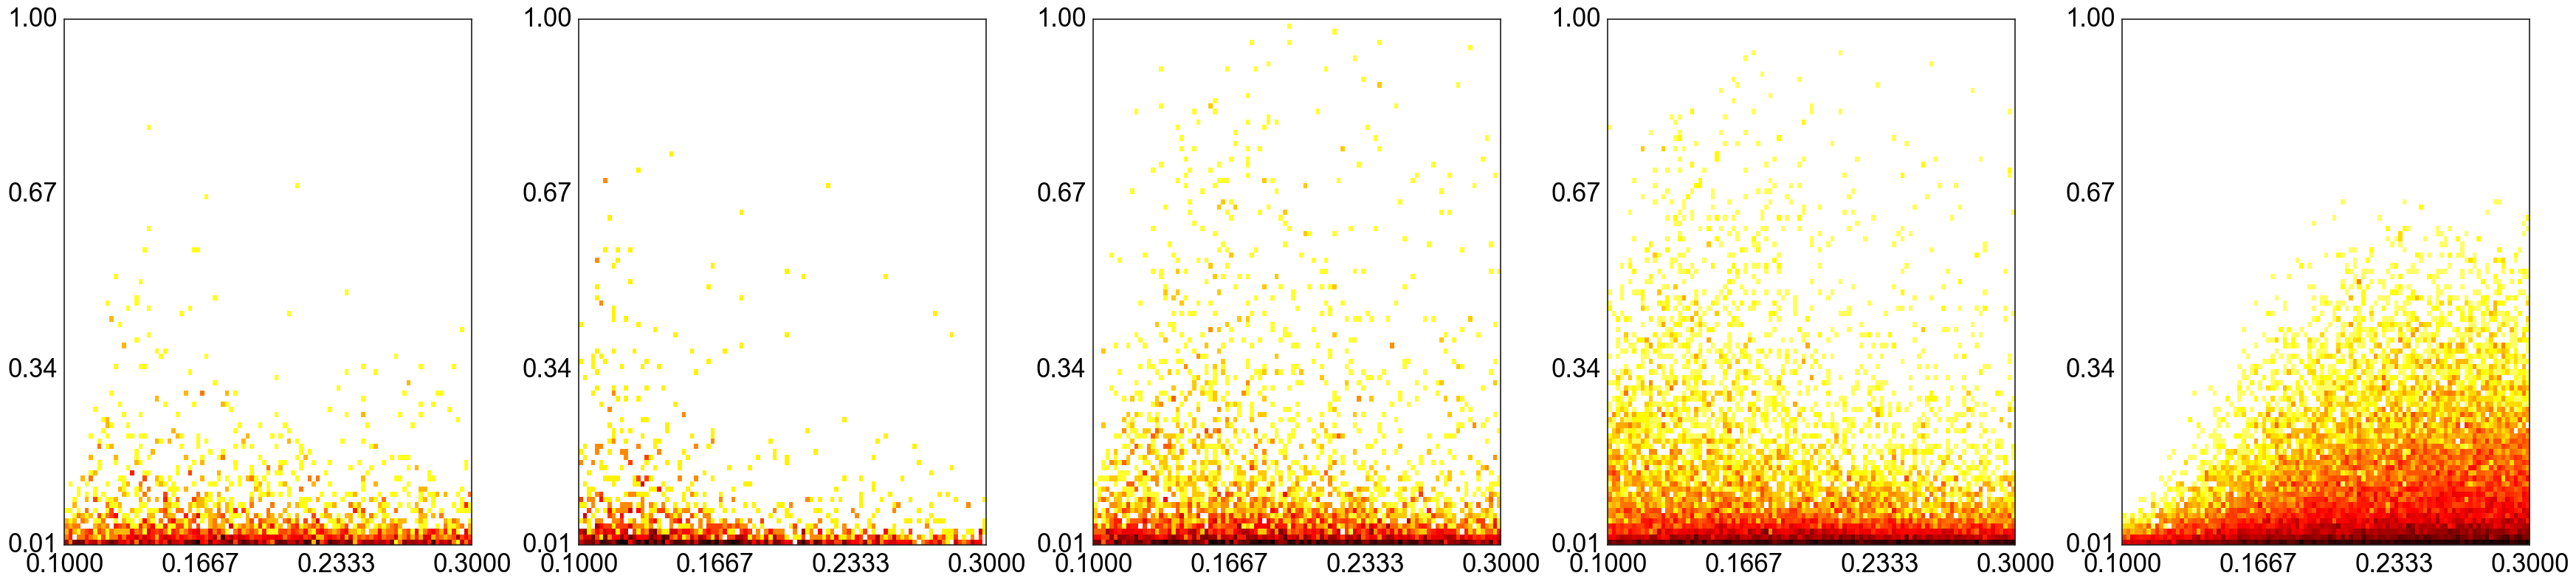

In [239]:
sample = sims
fig=plt.figure(figsize=(35,8))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1)
#     plot_2d_hist(sample['gen_b2'],sample['EvtsInBin_bin%d'%i],ax=ax);
#     plot_2d_hist(sample['gen_b2'],sample['ks_local_Pval_pcmZ_bin%d_C12'%i],ax=ax,norm='log'
#                  ,bins=(np.linspace(-0.1,0.6,100),np.linspace(0.01,1.,100)));
    plot_2d_hist(sample['gen_SigmaX'],sample['ks_local_Pval_pcmZ_bin%d_C12'%i],ax=ax,norm='log'
                 ,bins=(np.linspace(0.1,0.3,100),np.linspace(0.01,1.,100)));


#     NevtsData = cm_pars['C12'].get_value(i,'EvtsInBin')
#     xlim = ax.get_xlim()
#     plt.plot([xlim[0],xlim[1]],[20*NevtsData,20*NevtsData],'--')
#     ax.set_title(np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i]),fontsize=20)
#     ax.set_ylim(0.1,1)
# print np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmX_C12'])
plt.tight_layout()
# fig=plt.figure(figsize=(35,8))
# for i in range(5):
#     ax = fig.add_subplot(1,5,i+1)
#     plot_2d_hist(sample['gen_b2'],sample['EvtsInBin_bin%d'%i],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i],ax=ax);
#     NevtsData = cm_pars['C12'].get_value(i,'EvtsInBin')
#     xlim = ax.get_xlim()
#     plt.plot([xlim[0],xlim[1]],[20*NevtsData,20*NevtsData],'--')
#     ax.set_title(np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i]))
# #     ax.set_ylim(0,evtsgen_PmissBins[i])
# plt.tight_layout()
# fig=plt.figure(figsize=(35,8))
# for i in range(5):
# #     weights=sample['ks_local_Pval_pcmZ_bin%d_C12'%i]
#     weights=sample['ks_PvalTotal_Al27']
#     ax = fig.add_subplot(1,5,i+1)
#     loss = (evtsgen_PmissBins[i]-sample['EvtsInBin_bin%d'%i]).astype(float)/evtsgen_PmissBins[i]
#     ax.scatter(weights,sample['EvtsInBin_bin%d'%i]);
# #     ax.set_ylim(0.4,1);
# #     ax.set_xlim(0,1.e-5)
#     ax.set_title(np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i]))
plt.tight_layout()

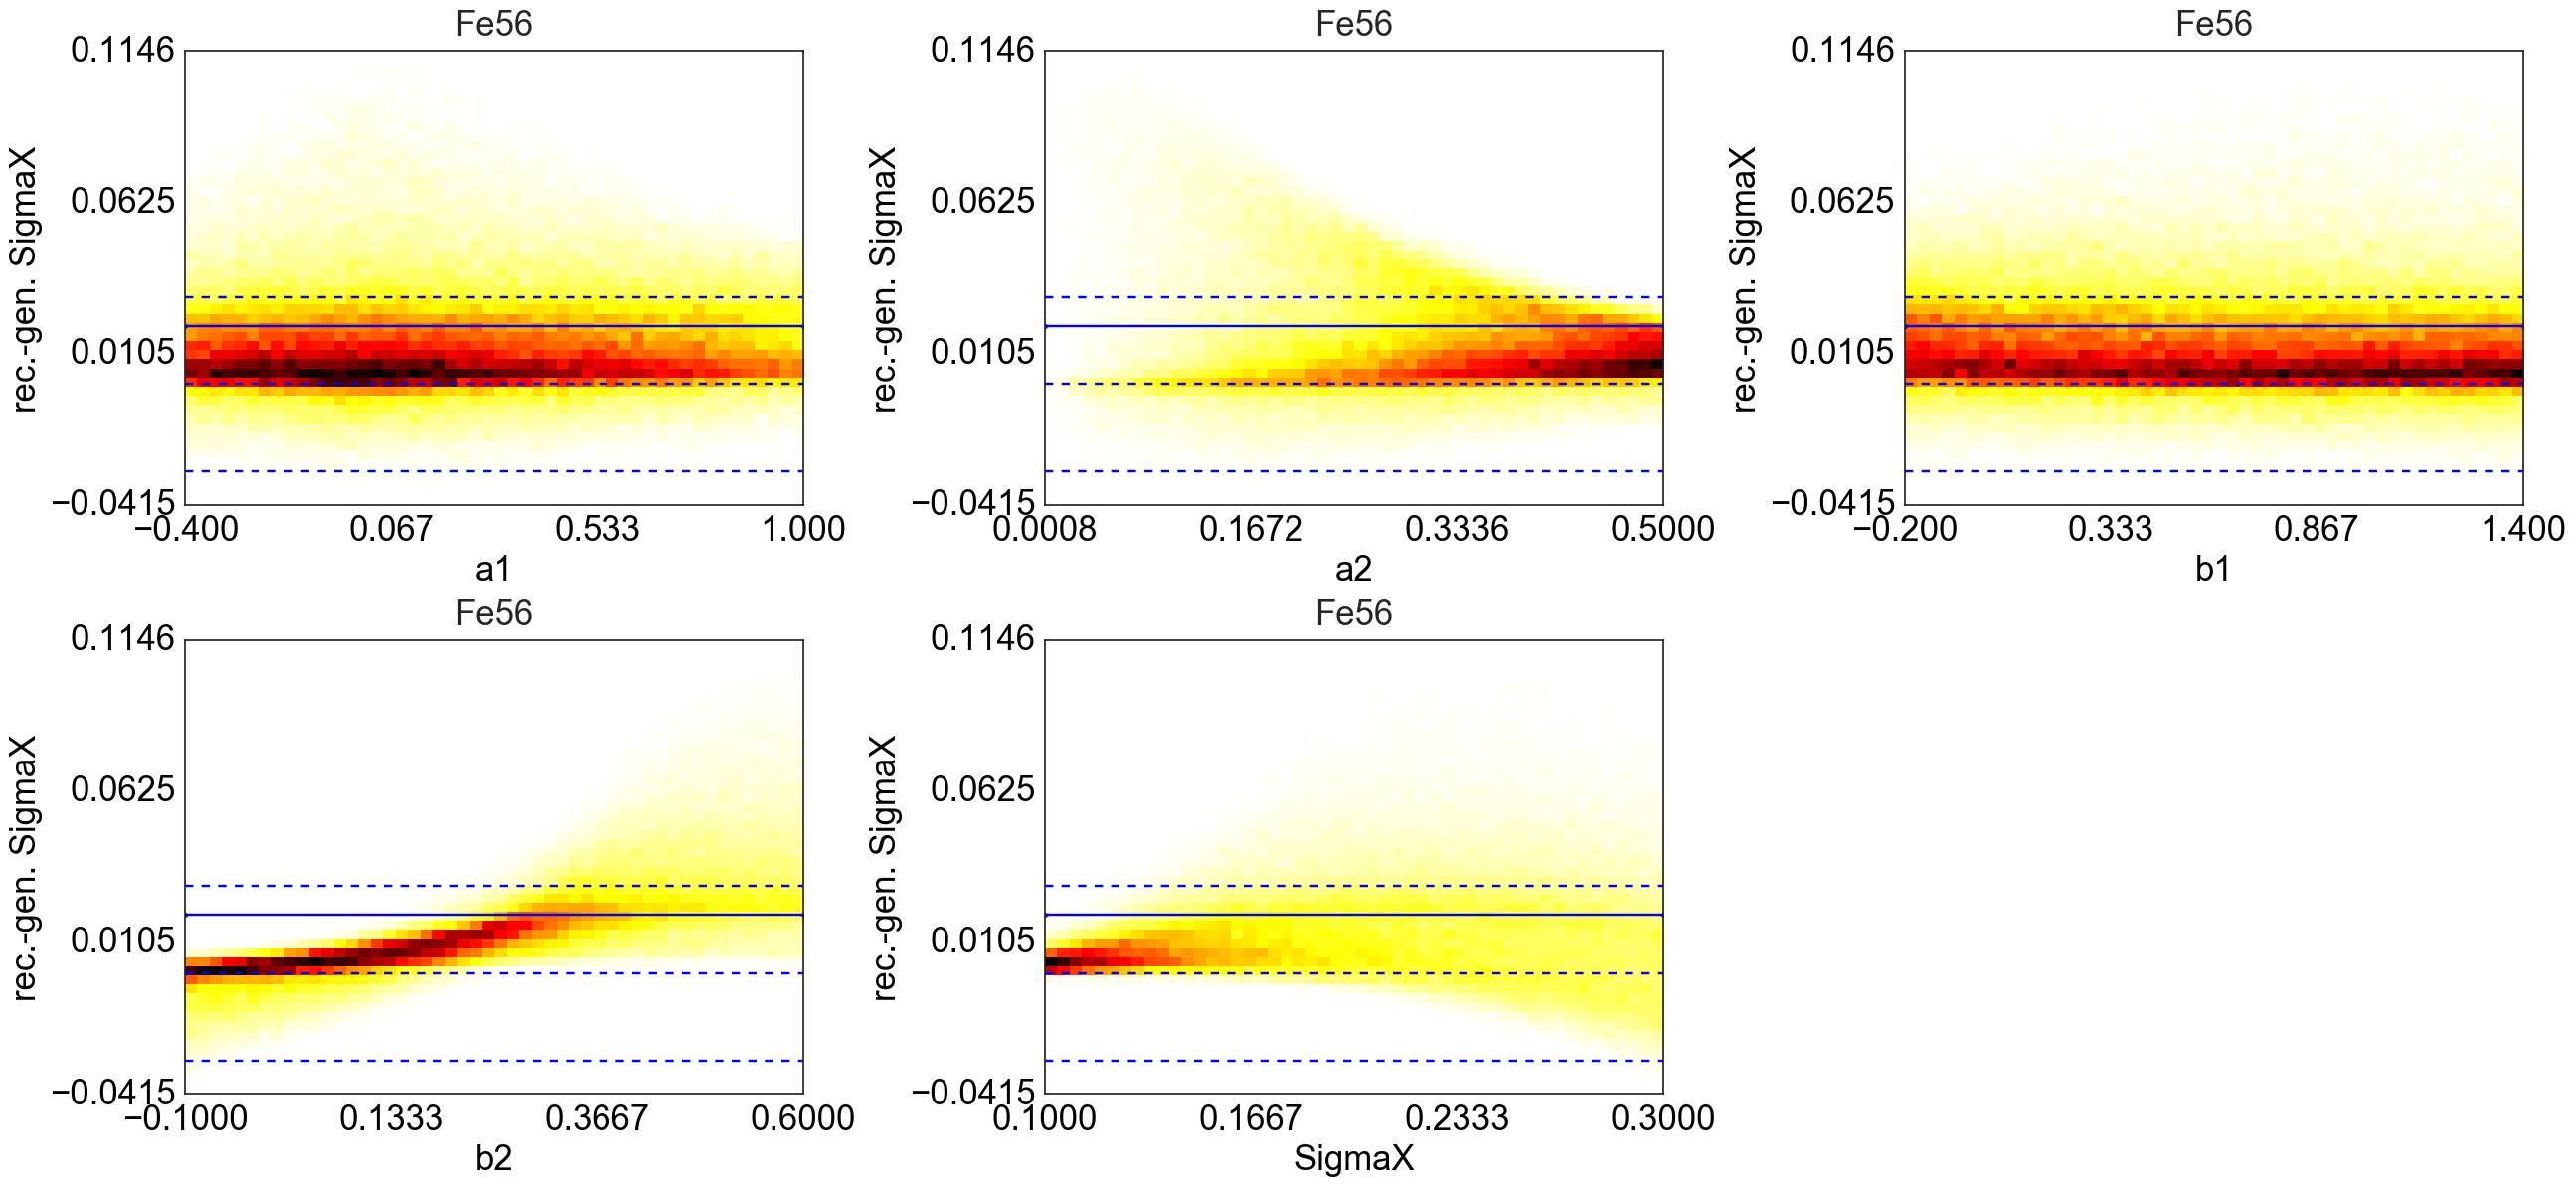

In [221]:
norm=''
# for target in ['C12']:#,'Al27','Fe56','Pb208']:

#     fig=plt.figure(figsize=(26,12))
#     for i,parx,pary in zip(range(6),
#                            ['a1','b1','SigmaX','SigmaX','SigmaX','SigmaX'],                         
#                            ['a2','b2','a1','a2','b1','b2']):
#         if i<2: ax = fig.add_subplot(2,4,(2*i+1,2*i+2))
#         else: ax = fig.add_subplot(2,4,3+i)
#         varx,vary,w = parx,pary, 'ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_'+target#'ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_'+target
#         plot_2d_hist(sample['gen_'+varx],sample['gen_'+vary],weights=sample[w],xlabel=parx,ylabel=pary,ax=ax,norm=norm)
# #         plot_2d_hist(sample['gen_'+varx],sample['gen_'+vary],xlabel=parx,ylabel=pary,ax=ax,norm=norm)
        
#         ax.set_title(target,fontsize=25,y=1.02)
#         plt.tight_layout()
                
samlpe=sims
for target in ['Fe56']:#,'Al27','Fe56','Pb208']:

    fig=plt.figure(figsize=(26,12))
    for i,parx in zip(range(6),
                           ['a1','a2','b1','b2','SigmaX']):
        ax = fig.add_subplot(2,3,i+1)
#         plot_2d_hist(sample['gen_'+parx],sample['rec'+parx]-sample['gen_'+parx],xlabel=parx,ylabel='rec. - gen. '+parx,ax=ax,norm=norm)        
        plot_2d_hist(sample['gen_'+parx],sample['recSigmaX']-sample['gen_SigmaX'],xlabel=parx,ylabel='rec.-gen. SigmaX',ax=ax,norm=norm)
#         plot_2d_hist(sample['gen_'+parx],sample['recSigmaX']-sample['gen_SigmaX'],weights=sample['ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_'+target],xlabel=parx,ylabel='rec.-gen. SigmaX',ax=ax,norm=norm)
        xlim=ax.get_xlim()
        plt.plot(xlim,[-0.03,-0.03],'--',color='blue')
        plt.plot(xlim,[0.,0.],'--',color='blue')
        plt.plot(xlim,[0.02,0.02],'.-',color='blue')
        plt.plot(xlim,[0.03,0.03],'--',color='blue')

        ax.set_title(target,fontsize=25,y=1.02)
    plt.tight_layout()
#     fig.savefig("/Users/erezcohen/Desktop/recSigmaX_vs_all.pdf")

-0.0170418665306


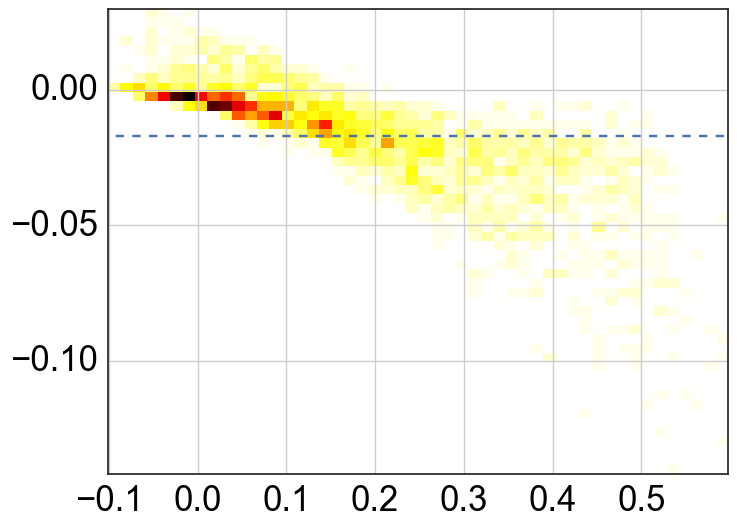

In [157]:
fig,ax=plt.subplots(figsize=(8,6))
weights=None#sims.ks_local_Pval_pcmZ_bin2_C12 #
plot_2d_hist( sims.rec_b2 , sims.gen_SigmaX - sims.recSigmaX  ,  ax=ax , weights=weights);
average = np.average( sims.gen_SigmaX - sims.recSigmaX  , weights=weights)
print average
plt.plot([-1,1],[average,average],'--')
ax.grid()

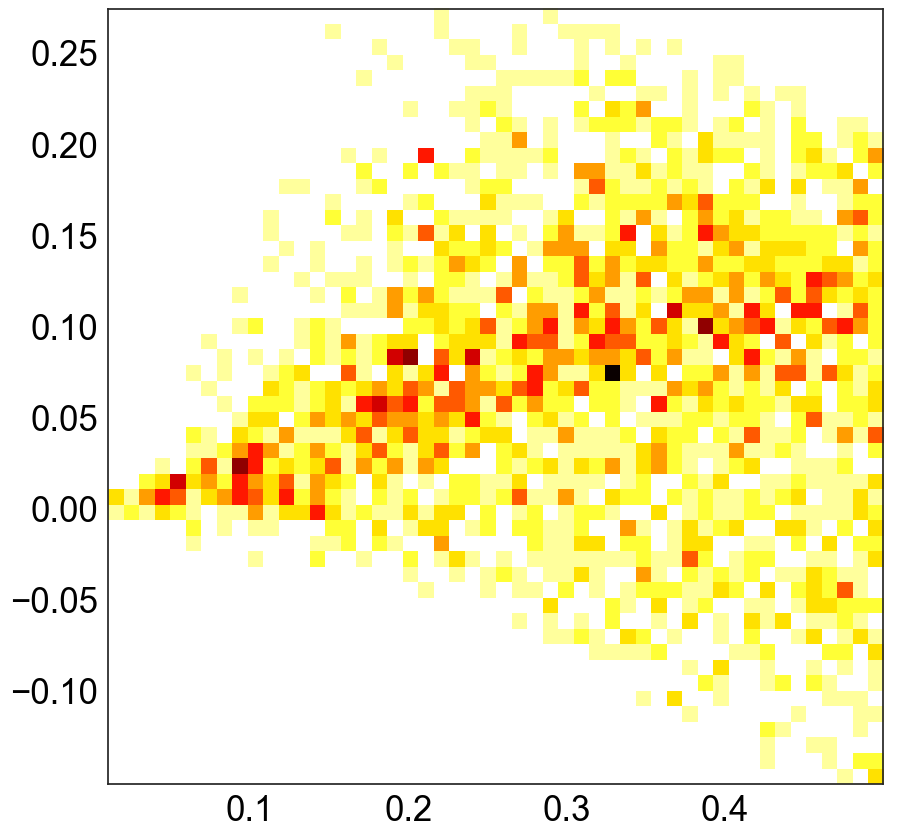

In [160]:
plot_2d_hist( sims.gen_a2 , sims.gen_b2 - sims.rec_b2  , weights=None);

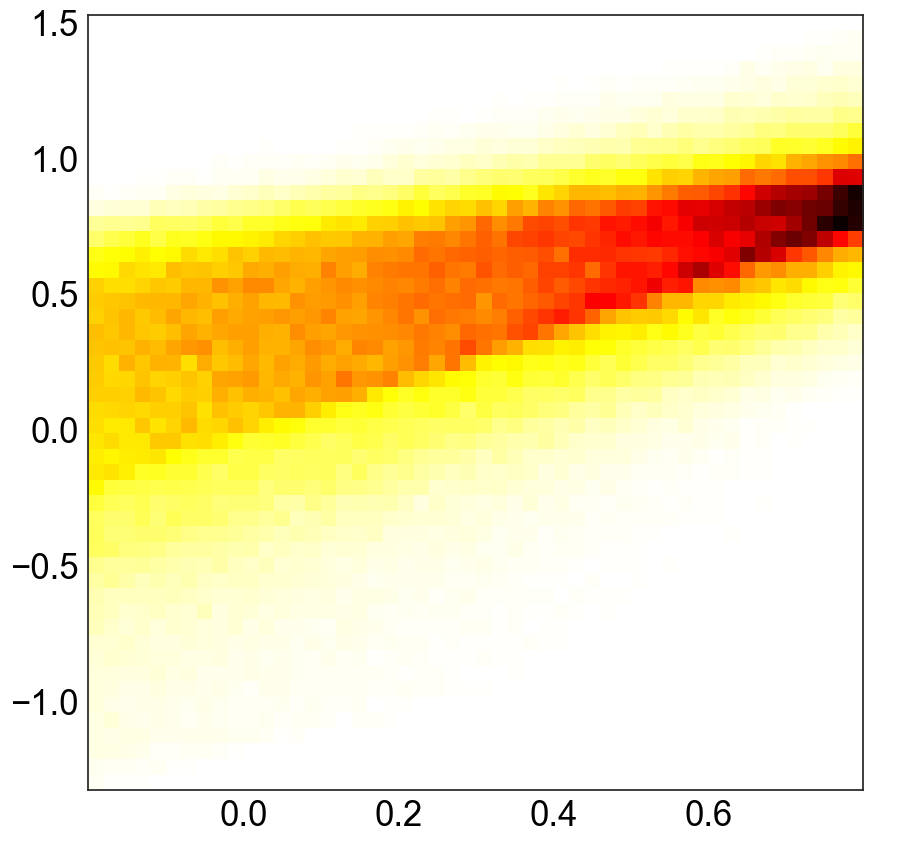

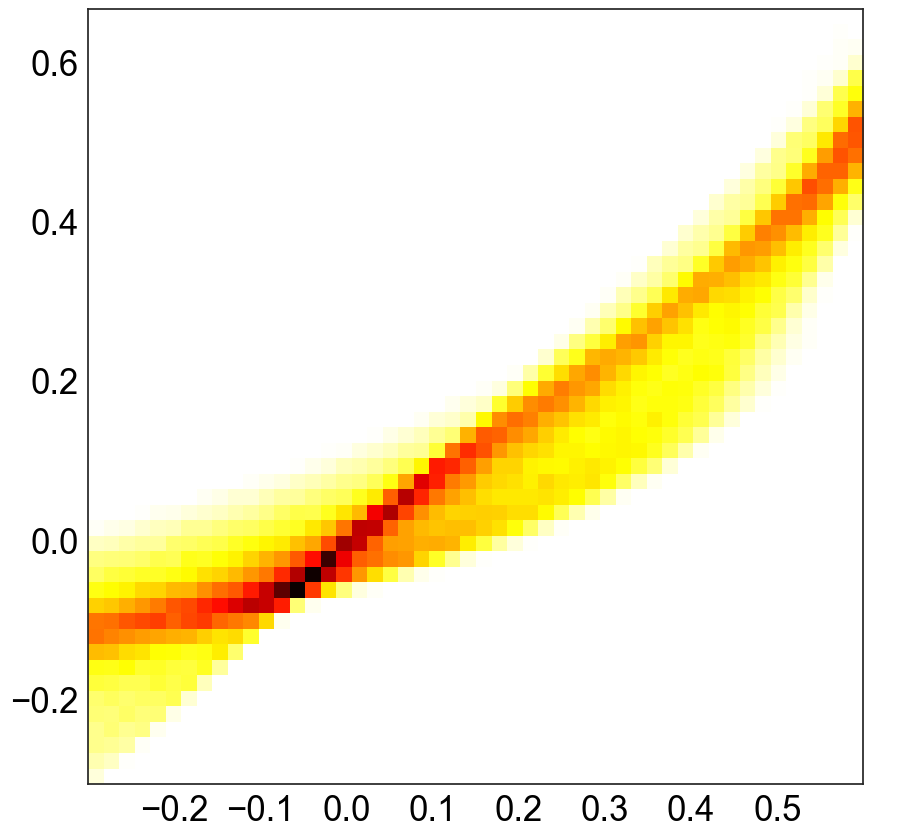

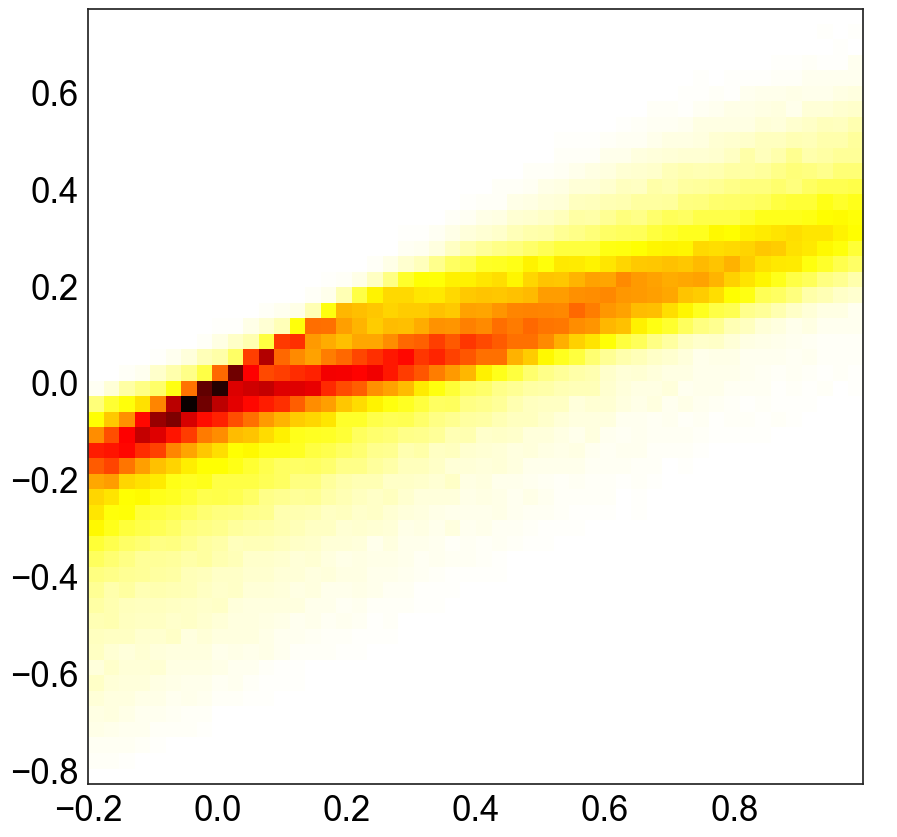

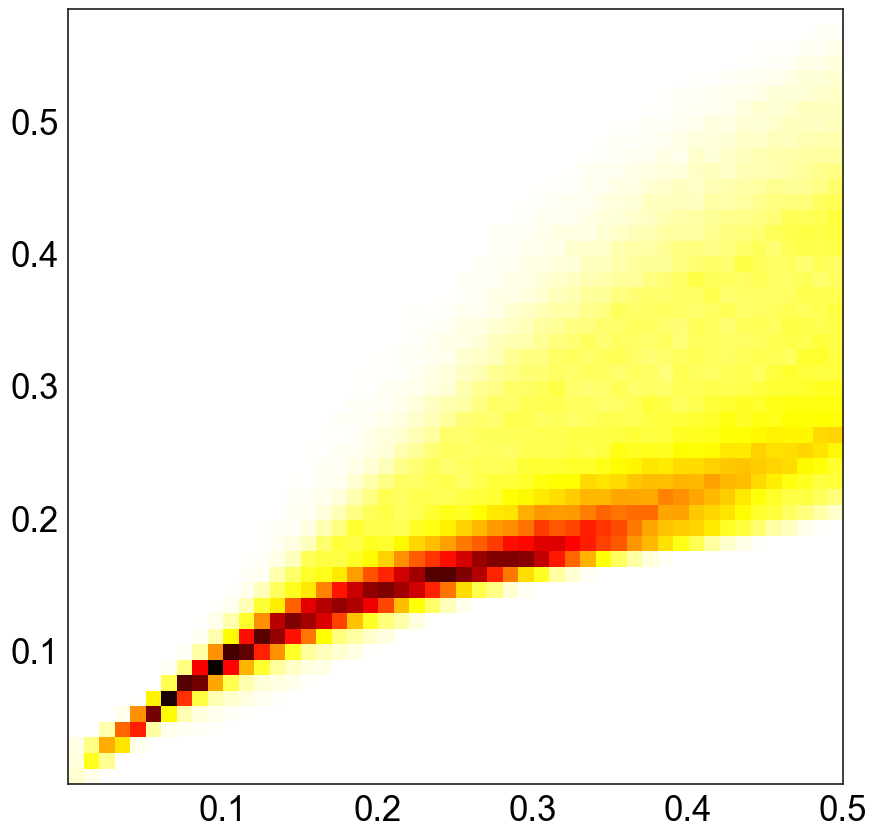

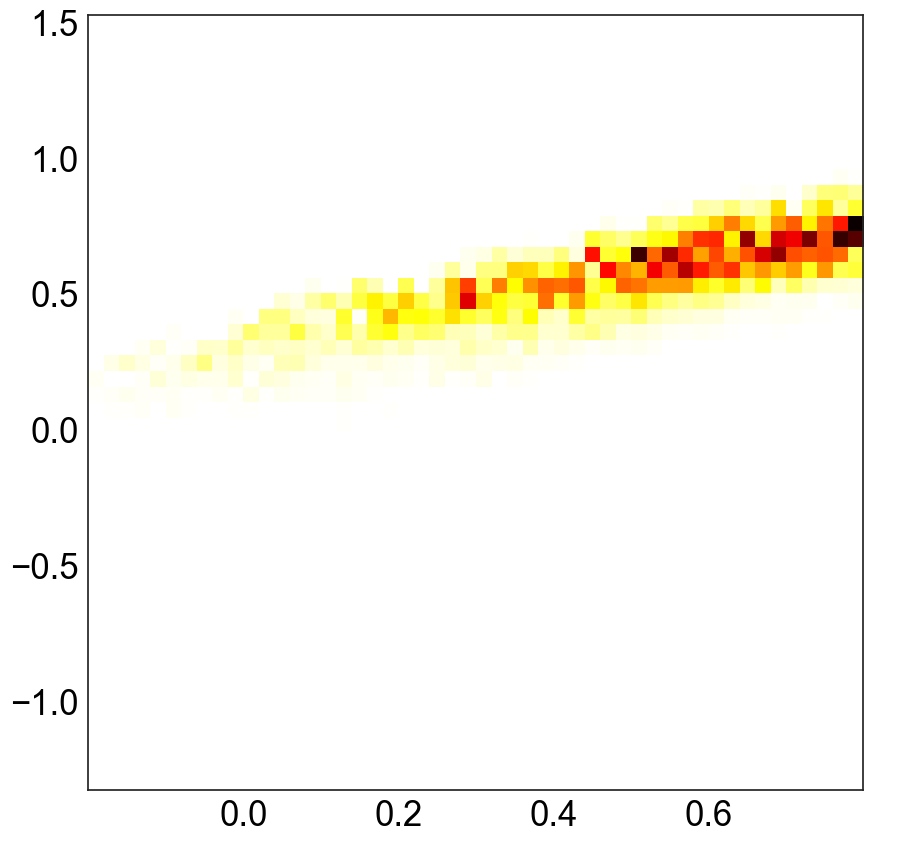

In [61]:
plot_2d_hist(sims[sims['rec_b1']>-100].gen_b1,sims[sims['rec_b1']>-100].rec_b1, norm='');
plot_2d_hist(sims[sims['rec_b2']>-100].gen_b2,sims[sims['rec_b2']>-100].rec_b2, norm='');
plot_2d_hist(sims[sims['rec_a1']>-100].gen_a1,sims[sims['rec_a1']>-100].rec_a1, norm='');
plot_2d_hist(sims[sims['rec_a2']>-100].gen_a2,sims[sims['rec_a2']>-100].rec_a2, norm='');
plot_2d_hist(sims[sims['rec_b1']>-100].gen_b1,sims[sims['rec_b1']>-100].rec_b1,weights=sims[sims['rec_b1']>-100].ks_PvalTotal_Al27, norm='');

[0.0, 0.99758600000000008]


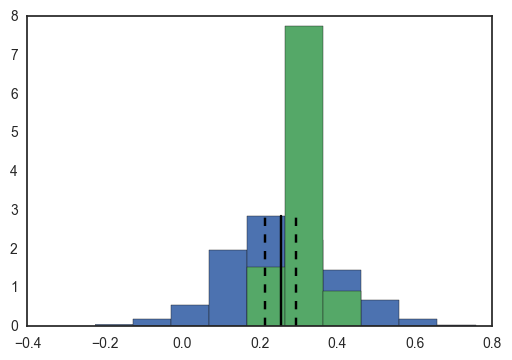

In [99]:
target,i_bin = 'Al27',4
# h,_,_=plt.hist(sims['recmean_z_pmiss_0.750_1.000'])
h,bins,_=plt.hist(sims['recmean_z_bin%d'%i_bin],normed=1)
plt.hist(sims['recmean_z_bin%d'%i_bin],weights=sims['ks_PvalTot_allPvals_'+target],bins=bins,normed=1)
# 12C mean of the distribution in this bin:
dataCMparameters = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/'+target+'_dataCMparameters.csv')
par, parErr = dataCMparameters.get_value(i_bin,'mean_z_unweighted'), dataCMparameters.get_value(i_bin,'mean_zErr_unweighted')
x = sims['ks_local_Pval_pcmZ_bin%d_%s'%(i_bin,target)]
print [np.min(x), np.max(x)]
plt.plot([par,par],[0,np.max(h)],color='black');
plt.plot([par+parErr,par+parErr],[0,np.max(h)],'--',color='black');
plt.plot([par-parErr,par-parErr],[0,np.max(h)],'--',color='black');